In [1]:
# Importing the librariess

import pandas as pd
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# sentiment analysis
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
import copy
import string
import operator
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import copy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 1.0 Exploratory Data Analysis: Business

In [2]:
business = pd.read_json('datasets/yelp_academic_dataset_business.json', lines=True)

In [3]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [5]:
business.categories.isnull().sum()

103

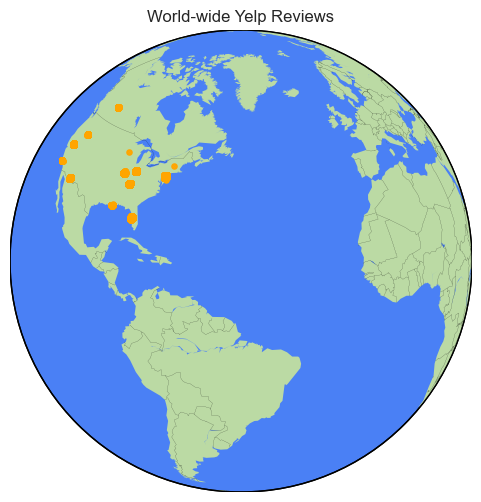

In [6]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5')
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()

Text(0.5, 1.0, 'North America Region')

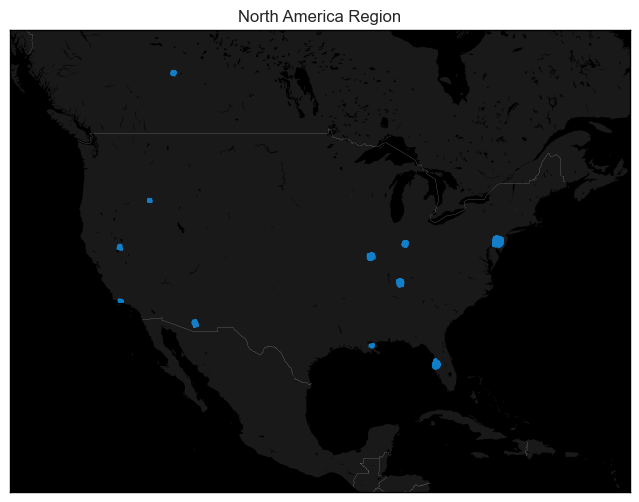

In [7]:
# Sample it down to only the North America region
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (business["longitude"]>lon_min) & \
         (business["longitude"]<lon_max) & \
         (business["latitude"]>lat_min) & \
         (business["latitude"]<lat_max)
#apply the selector to subset
NA_business=business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")

In [8]:
business.categories = business.categories.fillna(" ")
business.categories.isnull().sum()

0

In [9]:
#Check Duplicates
business.business_id.describe()

count                     150346
unique                    150346
top       Pns2l4eNsfO8kk83dixA6A
freq                           1
Name: business_id, dtype: object

In [10]:
business_overall = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,52268
1,Food,27781
2,Shopping,24395
3,Home Services,14356
4,Beauty & Spas,14292
...,...,...
1307,Patent Law,1
1308,Hainan,1
1309,Housing Cooperatives,1
1310,Guamanian,1


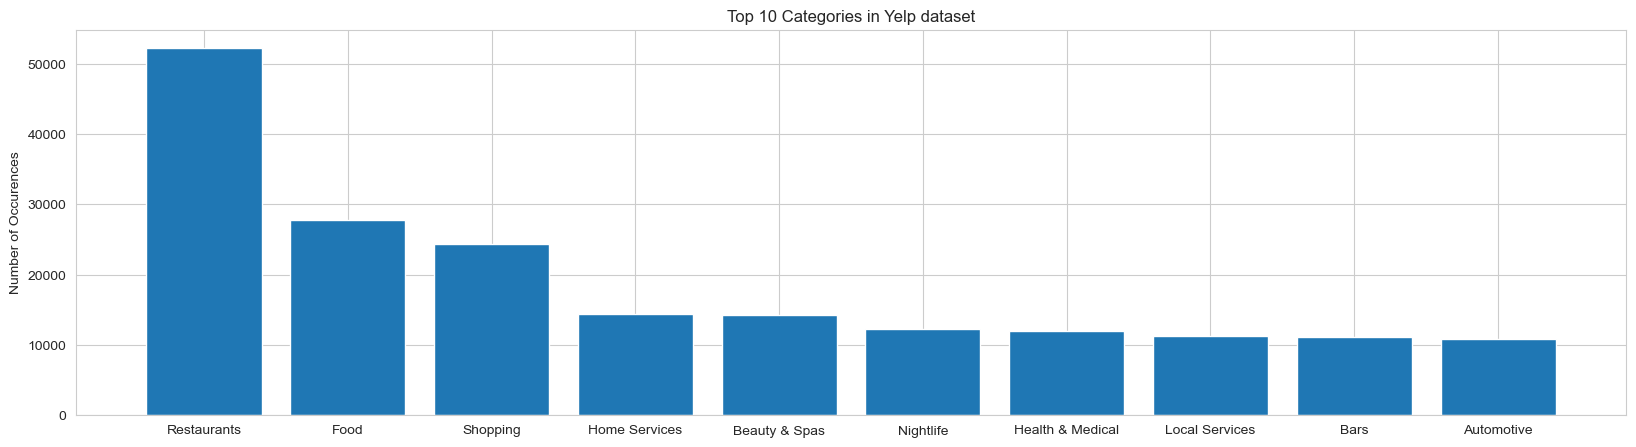

In [11]:
cat= cat.sort_values(by = 'Count', ascending = False)

cat = cat[0:10]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Categories in Yelp dataset')
plt.show()

In [12]:
# creating a dataframe to store all the records which has 'Restaurants' or 'Food' in their categories column
restaurant = pd.DataFrame()
for i in business.index:
    if 'Restaurants' in business.categories[i]:
        restaurant = restaurant.append(business.iloc[i])

In [13]:
# Taking into the consideration the restaurants which are open
# 1 = open, 0 = closed
restaurant = restaurant[restaurant['is_open']==1]

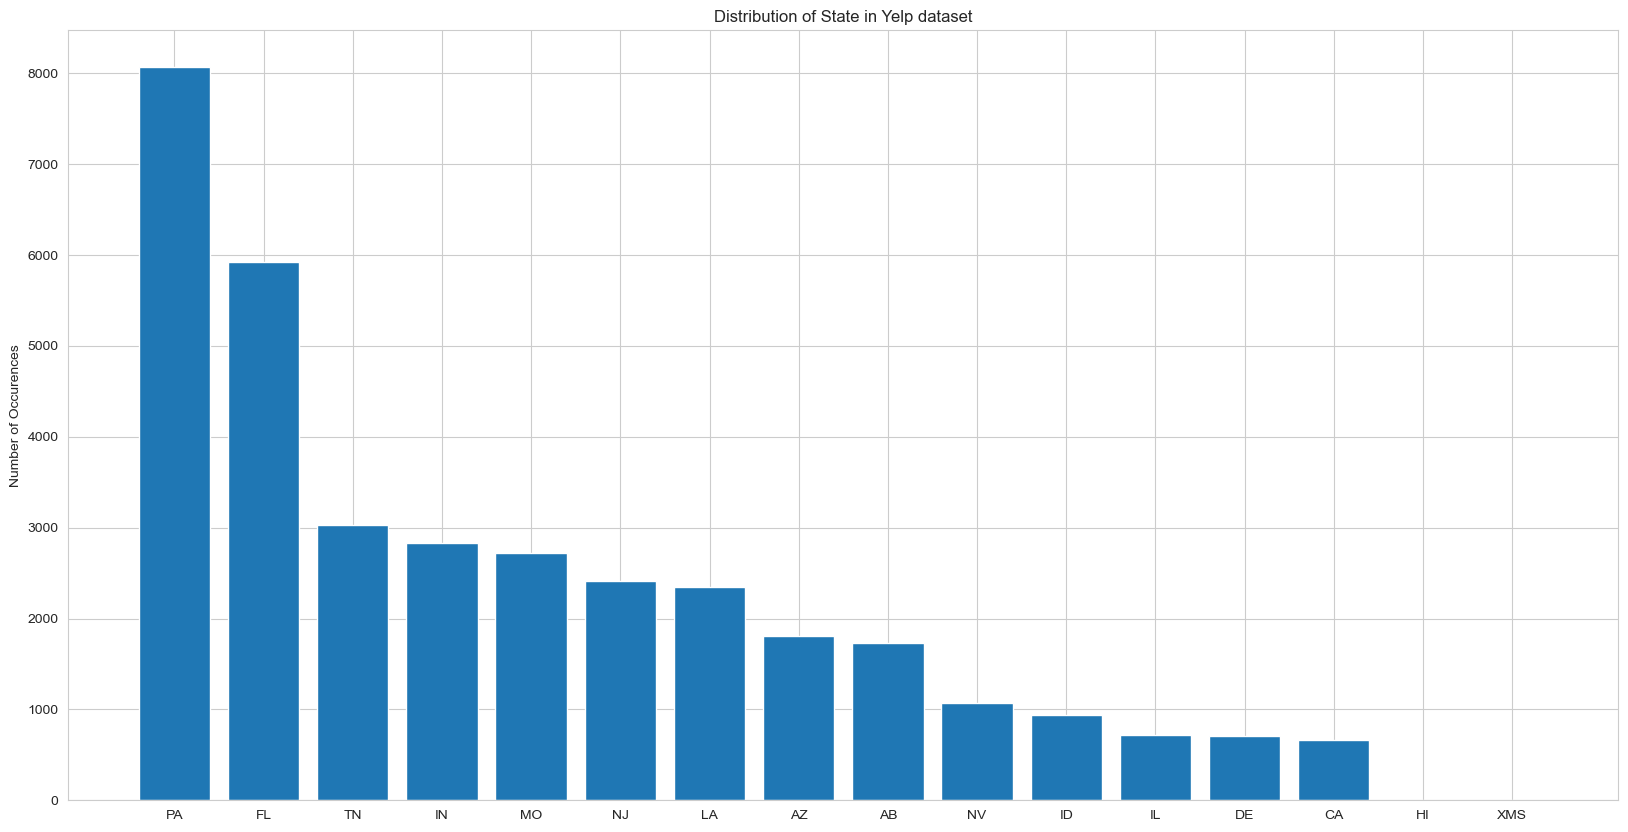

In [14]:
#Distribution of state in this dataset
state_count = restaurant.state.value_counts()
state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']
objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of State in Yelp dataset')
plt.show()

In [15]:
states = pd.Series(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
                    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
                    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
                    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
                    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])
avg_stars = pd.pivot_table(restaurant[restaurant['state'].isin(states)] , index = ['state'],
                           values = ['stars'], aggfunc = np.mean)

avg_stars=avg_stars.sort_values('stars',ascending=False)

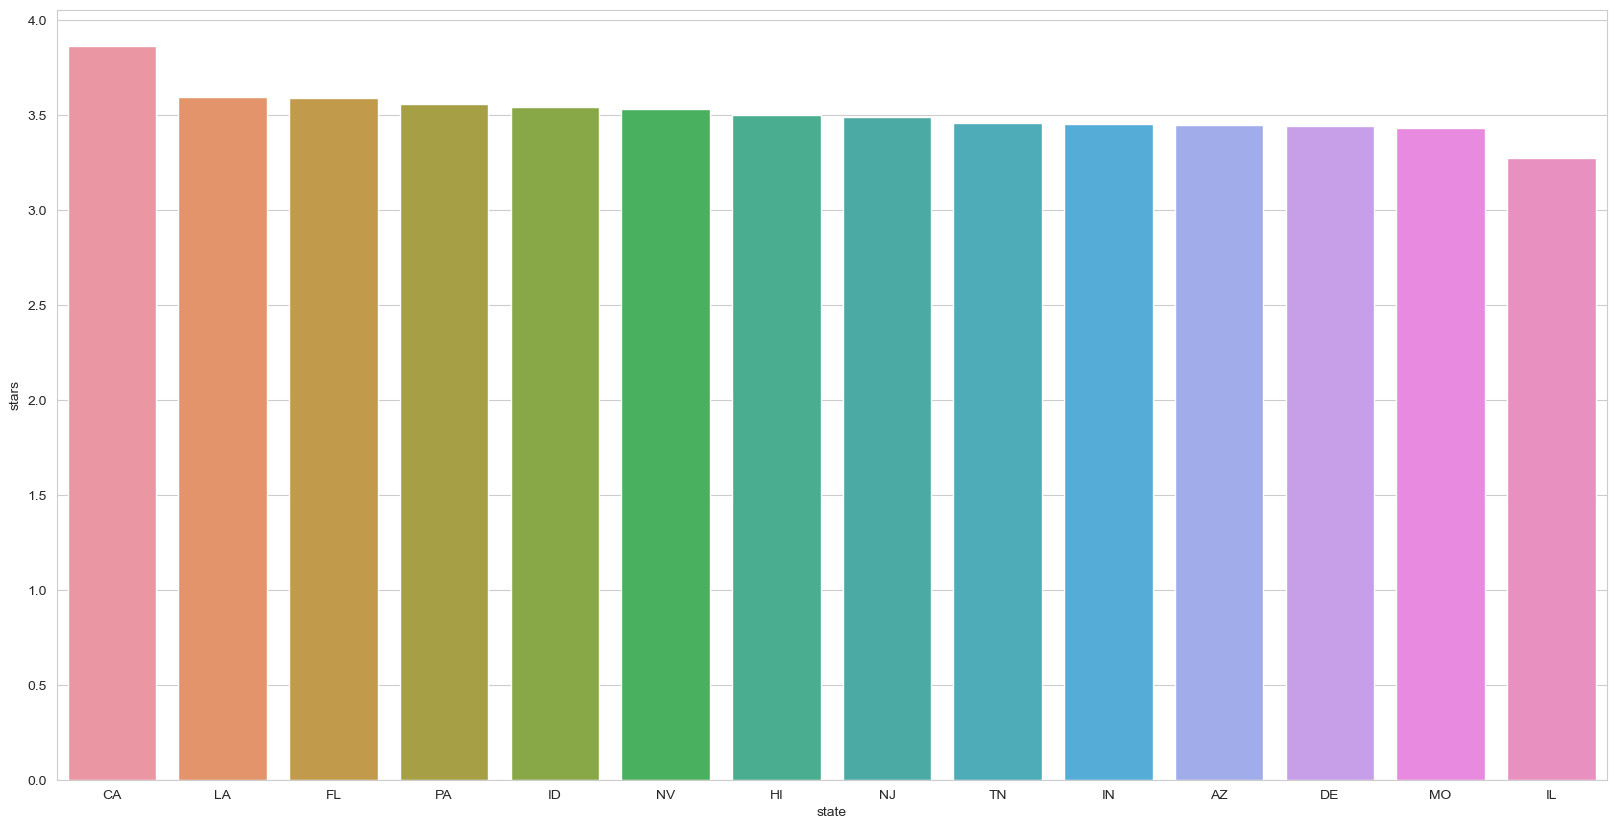

In [16]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
a = sns.barplot(x=avg_stars.index, y="stars", data=avg_stars)

In [17]:
business_in_AZ = restaurant[restaurant.state == 'AZ']
business_in_AZ = business_in_AZ.reset_index(drop = True)
business_in_AZ.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741,32.338572,-111.010760,4.0,22,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Pizza, Restaurants",None
1,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
2,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,2944 W Ina Rd,Tucson,AZ,85741,32.338724,-111.030310,4.0,58,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Sports Bars, Bars, Nightlife, Italian, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ..."
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ''casual'', 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
4,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,5680 S 12th Ave,Tucson,AZ,85706,32.149473,-110.978186,4.0,92,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Chinese","{'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1..."


In [18]:
## Checking for inconsistent Data
cities = business_in_AZ['city'].unique()
cities

array(['Tucson', 'Marana', 'Green Valley', 'Sahuarita', 'Vail',
       'Oro Valley', 'TUCSON', 'Mount Lemmon', 'Valencia West',
       'Catalina', 'Tuscon', 'South Tucson', 'Picture Rocks',
       'Corona De Tucson', 'Corona de Tucson'], dtype=object)

In [19]:
# Define a dictionary of incorrect to correct word mappings
word_mapping = {
    'TUCSON': 'Tucson',
    'Tuscon': 'Tucson',
    'South Tucson': 'Tucson',
    'Corona de Tucson': 'Tucson',
    'Corona De Tucson': 'Tucson'
}
# Function to replace incorrect words with correct ones
def replace_words(text):
    return word_mapping.get(text, text)
# Apply the function to the specified column
business_in_AZ['city'] = business_in_AZ['city'].apply(replace_words)

In [21]:
fig = px.scatter_mapbox(business_in_AZ, lat="latitude", lon="longitude", hover_name="city", color_discrete_sequence=["fuchsia"], zoom=8, height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

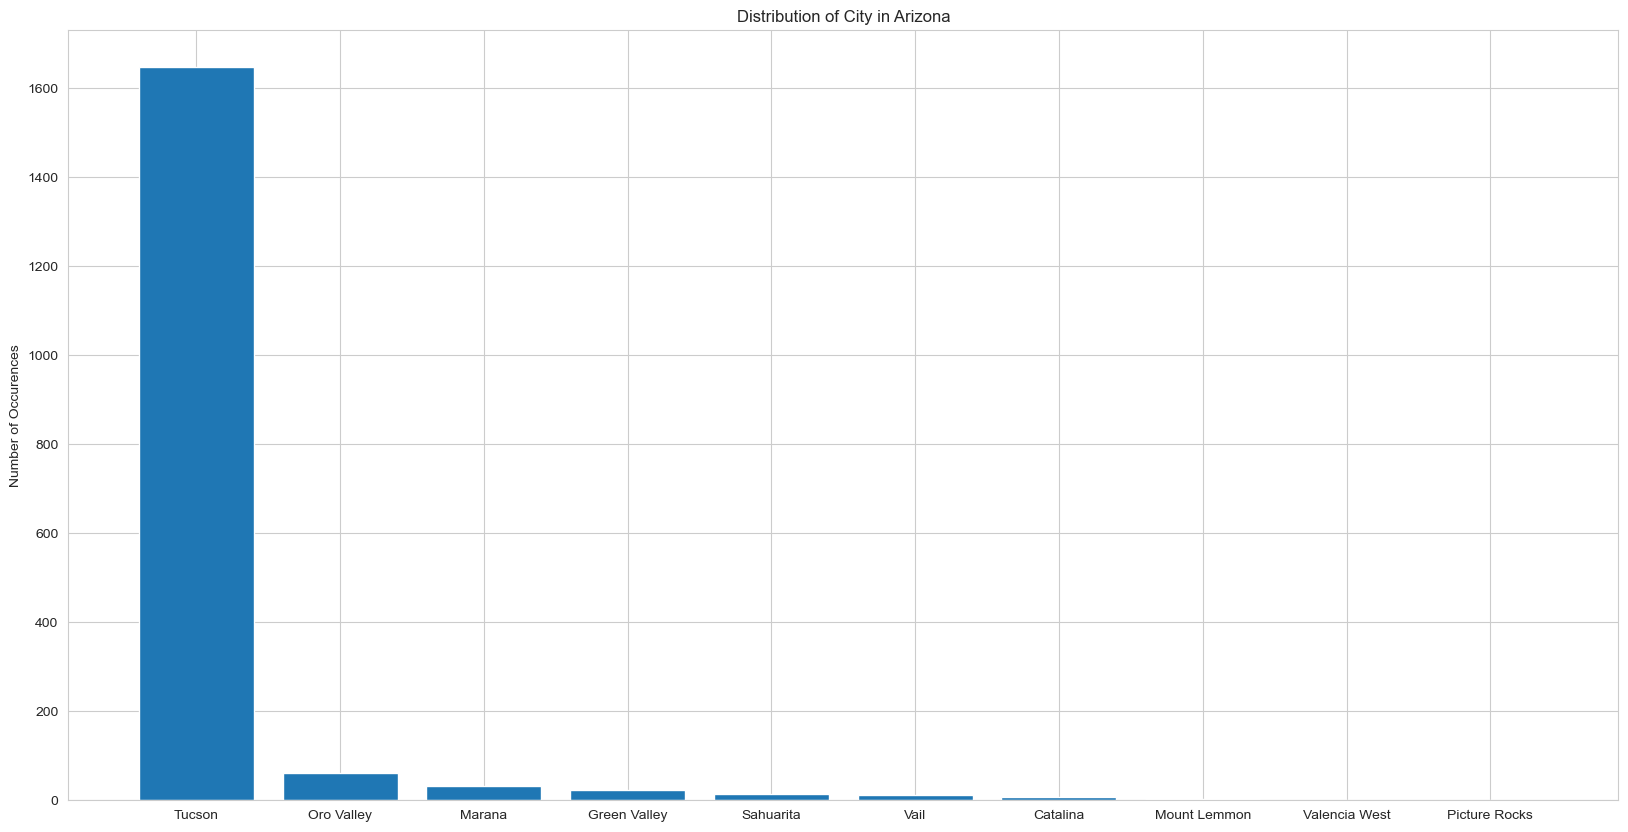

In [22]:
#Distribution of state in this dataset
city_count = business_in_AZ.city.value_counts()
city_count = city_count.to_frame().reset_index()
city_count.columns = ['city', 'Counts']
objects = list(city_count.city)
y_pos = np.arange(len(objects))
Numbers = list(city_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of City in Arizona')
plt.show()

In [23]:
business_in_TC = business_in_AZ[business_in_AZ.city == 'Tucson']
business_in_TC = business_in_TC.reset_index(drop = True)
business_in_TC.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741,32.338572,-111.010760,4.0,22,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Pizza, Restaurants",None
1,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
2,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,2944 W Ina Rd,Tucson,AZ,85741,32.338724,-111.030310,4.0,58,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Sports Bars, Bars, Nightlife, Italian, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ..."
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ''casual'', 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
4,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,5680 S 12th Ave,Tucson,AZ,85706,32.149473,-110.978186,4.0,92,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Chinese","{'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1..."


In [24]:
# Filter for businesses in Tucson
tucson_buzz = business[business.city.str.contains('Tucson', regex=True) == True].copy(deep=True)
tucson_buzz.reset_index(drop=True, inplace=True)

# Fix naming convention
tucson_buzz['city'] = 'Tucson'

# Filter for restaurants
tucson_restaurants = tucson_buzz[tucson_buzz.categories.str.contains('Restaurants|Restaurant', regex=True) == True].copy(deep=True)

In [25]:
# Filter for restaurants with reviews
tucson = tucson_restaurants[tucson_restaurants.review_count >= 100].copy(deep=True)
tucson.reset_index(drop=True, inplace=True)

## 2.0 Exploratory Data Analysis: Review

In [26]:
review = pd.read_json('datasets/yelp_academic_dataset_review.json', lines=True)

In [27]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [28]:
# Shape of the dataset
print("Shape of the dataset:")
print(review.shape)

Shape of the dataset:
(6990280, 9)


In [29]:
# Column names
print("Column names:")
print(review.columns)

Column names:
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


In [30]:
# Datatype of each column
print("Datatype of each column:")
print(review.dtypes)

Datatype of each column:
review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object


In [31]:
business_ratings = pd.merge(tucson, review, on = 'business_id', how = 'left')

In [33]:
business_ratings.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",xnA_bGa4zJ7fLUPTOCT0-A,nabJKapjKahYfTtnBDG6JQ,4,1,0,0,One of my most favorite Indian restaurants. No...,2011-04-22 02:02:10
1,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",453I3aMT_YCQW655gKkzdQ,SmaAK6il7pyldoqZrH7iTA,4,0,0,1,Food= Amazing\nService= Great\nPrices= Reasona...,2014-04-20 00:32:54
2,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",QTE44bHheG6ugQU4em4SdQ,B6FbaEEn5Uh4kEqv4kUdgA,3,0,0,0,"OK lunch buffet, but too oily. i think weeken...",2005-03-12 03:47:06
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",5f42pKbzLJWwtsa0StDwgA,OqTs0lHg5ZXvF1S0bJfzFA,5,0,0,0,"Favorite indian place in Tucson, hands down! M...",2013-01-28 02:55:30
4,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",-vIuycScTA7SVwHDi1ENeg,QaBNIUwzgN4v_5wjmlJOCg,4,3,1,1,"I'm torn between 3 and 4 stars, but have decid...",2011-02-14 18:01:48


<Axes: xlabel='stars_y', ylabel='count'>

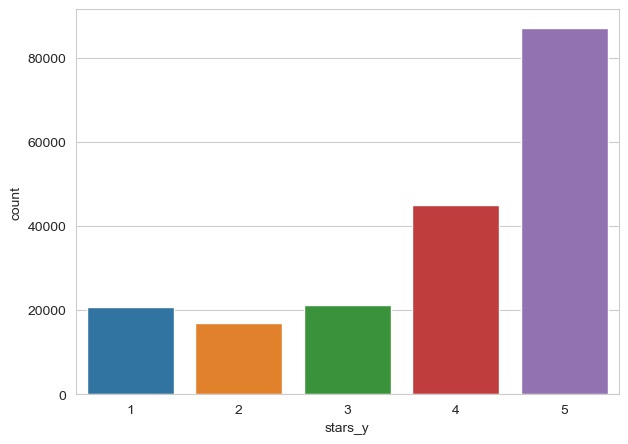

In [34]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'stars_y', data = business_ratings)

In [35]:
#Check which all Restaurants got 5-star ratings and how much
Five_star = business_ratings[business_ratings['stars_y'] == 5.0]
Five_star_order = Five_star.name.value_counts()
Five_star_order = Five_star_order.to_frame().reset_index()
Five_star_order.columns = ['name', 'Counts']
Five_star_order = Five_star_order.head(10)
Five_star_order = Five_star_order.sort_values(['Counts'], ascending = True)
Five_star_order

,name,Counts
9,Seis Kitchen,640
8,Tumerico,659
7,Guadalajara Original Grill,670
6,Cafe Poca Cosa,687
5,El Guero Canelo,722
4,The Parish,765
3,El Charro Cafe,773
2,Baja Cafe,864
1,Serial Grillers,892
0,Prep & Pastry,1443


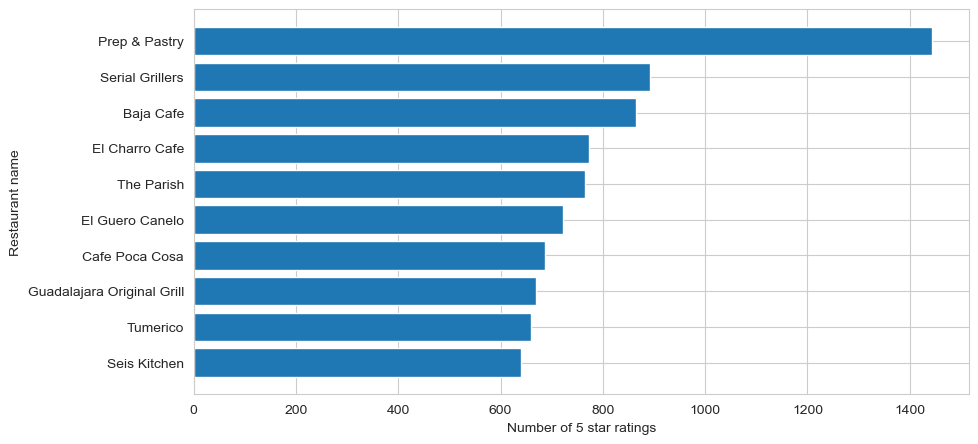

In [36]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
plt.barh(Five_star_order.name, Five_star_order.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Number of 5 star ratings')
plt.show()

In [37]:
Cust = []
for i in business_ratings['stars_y']:
    if (i == 1):
        Cust.append('BAD')
    elif (i == 3) | (i == 2):
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')


business_ratings['customer_exp'] = Cust
business_ratings['customer_exp'].value_counts()
business_ratings.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,customer_exp
0,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",xnA_bGa4zJ7fLUPTOCT0-A,nabJKapjKahYfTtnBDG6JQ,4,1,0,0,One of my most favorite Indian restaurants. No...,2011-04-22 02:02:10,GOOD
1,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",453I3aMT_YCQW655gKkzdQ,SmaAK6il7pyldoqZrH7iTA,4,0,0,1,Food= Amazing\nService= Great\nPrices= Reasona...,2014-04-20 00:32:54,GOOD
2,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",QTE44bHheG6ugQU4em4SdQ,B6FbaEEn5Uh4kEqv4kUdgA,3,0,0,0,"OK lunch buffet, but too oily. i think weeken...",2005-03-12 03:47:06,NEUTRAL
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",5f42pKbzLJWwtsa0StDwgA,OqTs0lHg5ZXvF1S0bJfzFA,5,0,0,0,"Favorite indian place in Tucson, hands down! M...",2013-01-28 02:55:30,GOOD
4,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,"{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",-vIuycScTA7SVwHDi1ENeg,QaBNIUwzgN4v_5wjmlJOCg,4,3,1,1,"I'm torn between 3 and 4 stars, but have decid...",2011-02-14 18:01:48,GOOD


In [38]:
#Creating a new column in the dataset for the number of words in the review
business_ratings['length'] = business_ratings['text'].apply(len)
business_ratings.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,stars_y,useful,funny,cool,text,date,customer_exp,length
0,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,xnA_bGa4zJ7fLUPTOCT0-A,nabJKapjKahYfTtnBDG6JQ,4,1,0,0,One of my most favorite Indian restaurants. No...,2011-04-22 02:02:10,GOOD,769
1,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,453I3aMT_YCQW655gKkzdQ,SmaAK6il7pyldoqZrH7iTA,4,0,0,1,Food= Amazing\nService= Great\nPrices= Reasona...,2014-04-20 00:32:54,GOOD,79
2,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,QTE44bHheG6ugQU4em4SdQ,B6FbaEEn5Uh4kEqv4kUdgA,3,0,0,0,"OK lunch buffet, but too oily. i think weeken...",2005-03-12 03:47:06,NEUTRAL,78
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,5f42pKbzLJWwtsa0StDwgA,OqTs0lHg5ZXvF1S0bJfzFA,5,0,0,0,"Favorite indian place in Tucson, hands down! M...",2013-01-28 02:55:30,GOOD,330
4,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.25096,-110.959158,4.0,446,...,-vIuycScTA7SVwHDi1ENeg,QaBNIUwzgN4v_5wjmlJOCg,4,3,1,1,"I'm torn between 3 and 4 stars, but have decid...",2011-02-14 18:01:48,GOOD,1692


In [39]:
print("Shape of the Restaurant review dataset :", business_ratings.shape)

Shape of the Restaurant review dataset : (191113, 24)


stars_y
1    672.949317
2    727.620524
3    670.263556
4    565.826545
5    437.603573
Name: length, dtype: float64

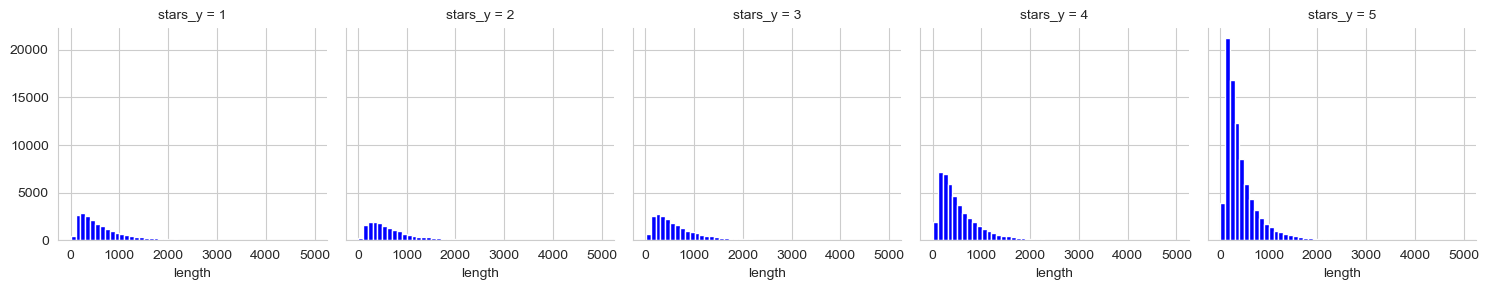

In [40]:
# Comparing text lenght of stars
graph = sns.FacetGrid(data=business_ratings,col='stars_y')
graph.map(plt.hist,'length',bins=50,color='blue')
business_ratings.groupby('stars_y').mean()['length']

<Axes: xlabel='stars_y', ylabel='length'>

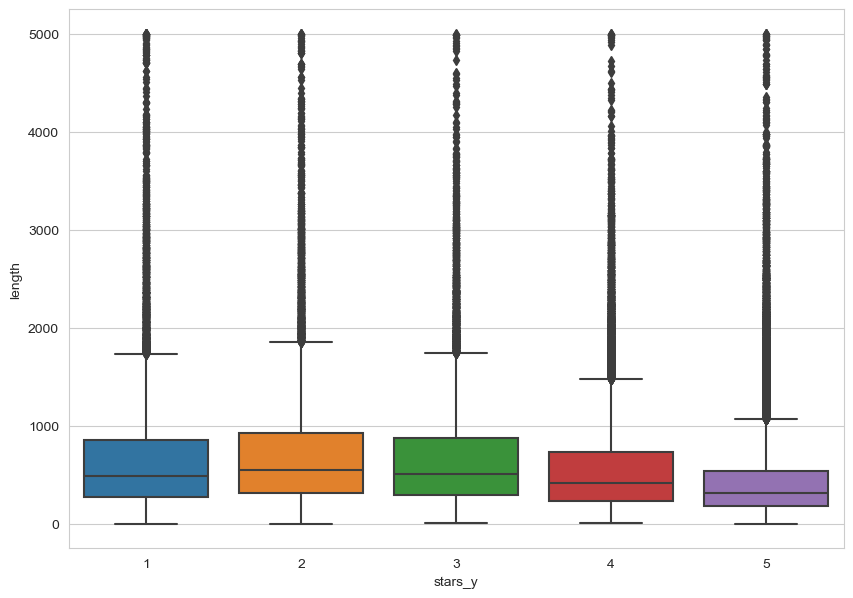

In [41]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'stars_y', y = 'length', data = business_ratings)

<Axes: xlabel='customer_exp', ylabel='count'>

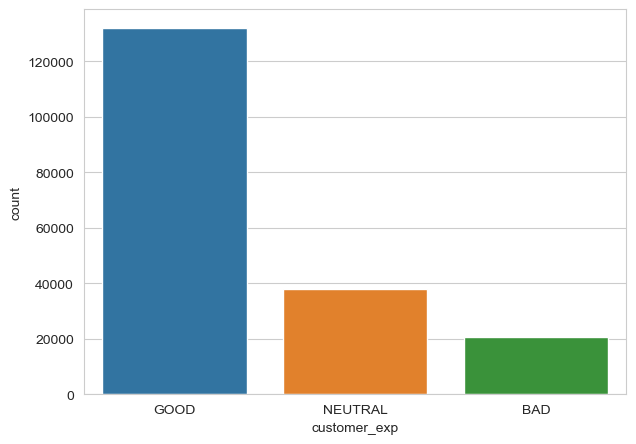

In [42]:
plt.figure(figsize = (7,5))
sns.countplot(x='customer_exp', data = business_ratings)

customer_exp
BAD        672.949317
GOOD       481.282636
NEUTRAL    695.586943
Name: length, dtype: float64

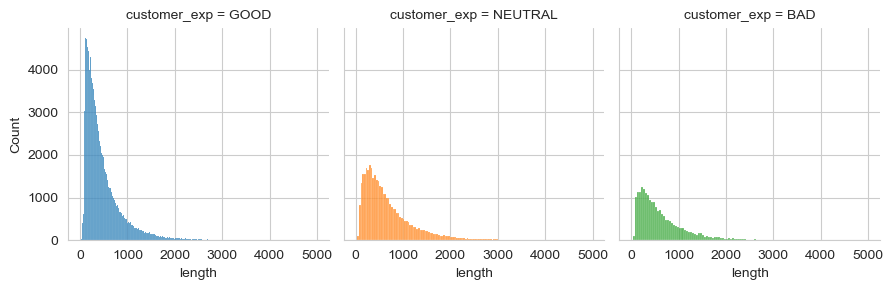

In [43]:
# Comparing text lenght of costumer experience
a = sns.FacetGrid(data = business_ratings, col = 'customer_exp', hue = 'customer_exp')
a.map(sns.histplot, "length")
business_ratings.groupby('customer_exp').mean()['length']

In [44]:
# Getting the mean values of the vote columns with respect to the stars on the review
stval = business_ratings[['stars_y','useful', 'funny','cool', 'length']].groupby('stars_y').mean()
stval

,useful,funny,cool,length
stars_y,,,,
1,1.681958,0.502308,0.165705,672.949317
2,1.528238,0.428767,0.212958,727.620524
3,1.045585,0.324022,0.312661,670.263556
4,0.985586,0.305557,0.571958,565.826545
5,0.874838,0.227421,0.540292,437.603573


<Axes: >

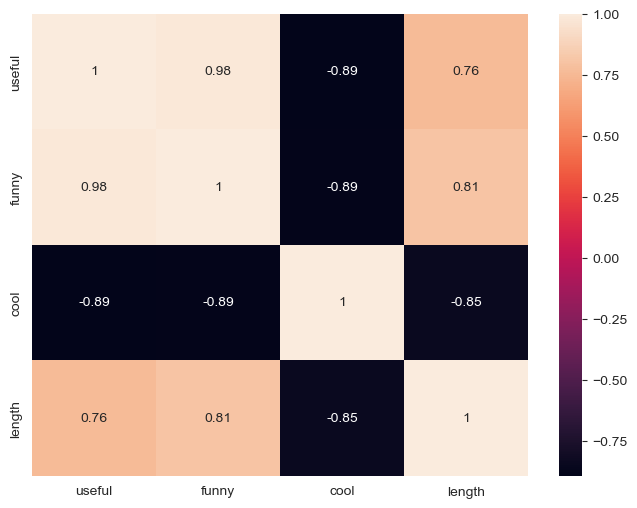

In [45]:
#Correlation between voting columns
plt.figure(figsize = (8,6))
sns.heatmap(stval.corr(), annot=True)

In [46]:
business_ratings_date = business_ratings[['date', 'stars_y']]
business_ratings_date.head()

,date,stars_y
0,2011-04-22 02:02:10,4
1,2014-04-20 00:32:54,4
2,2005-03-12 03:47:06,3
3,2013-01-28 02:55:30,5
4,2011-02-14 18:01:48,4


In [47]:
# let's check the total feedback rating per year
business_ratings_date['dates'] = pd.to_datetime(business_ratings_date['date']).dt.date
business_ratings_date['dates'] = pd.DatetimeIndex(business_ratings_date['dates']).year
business_ratings_date.head()

,date,stars_y,dates
0,2011-04-22 02:02:10,4,2011
1,2014-04-20 00:32:54,4,2014
2,2005-03-12 03:47:06,3,2005
3,2013-01-28 02:55:30,5,2013
4,2011-02-14 18:01:48,4,2011


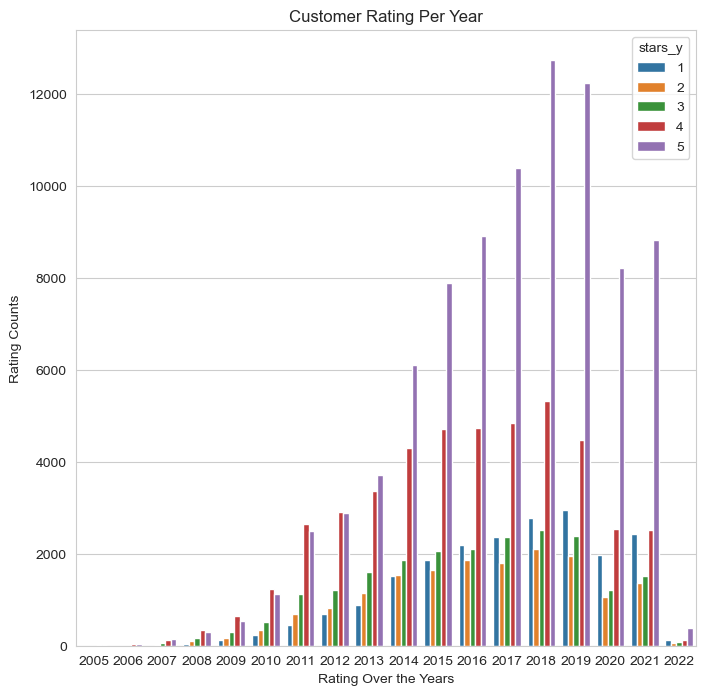

In [48]:
#Let's consider the rating performance per year
plt.figure(figsize=(8, 8))
sns.countplot(x = 'dates', hue ='stars_y', data = business_ratings_date)
plt.title('Customer Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

## 3.0 Data Preprocessing

3.1 Labelling the data

In [49]:
## This the function for labelling the data
## If the stars achieved by a restaurant is above 3 then its "Positive" review or else it is a "Negative" review
## Label 1 signifies postive reviews
## Label 0 signifies negative reviews
def target_label(data):
    target = {"Target_sentiment":[]}
    for i in data["stars_y"]:
        j = 0
        if i > 3:
            j = 1
            target["Target_sentiment"].append(j)
        else:
            target["Target_sentiment"].append(j)

    data = data.join(pd.DataFrame(target, index = data.index))
    data = data.drop('stars_y', axis = 1)
    data_sample = data.sample(n = 10000, random_state = 42)
    data_sample = data_sample.reset_index(drop = True)
    return(data_sample)

In [50]:
## Calling the above function for creating the sentiment labels
business_ratings_lb = target_label(business_ratings)

In [51]:
business_ratings_lb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,useful,funny,cool,text,date,customer_exp,length,Target_sentiment
0,rLMRRaLhgxH2cU2XuJf_BQ,Commoner & Co.,"6960 E Sunrise Dr, Ste 110",Tucson,AZ,85750,32.308071,-110.843790,4.0,482,...,jEBm-uTdDcrsohJre-YeVA,u2G4ualPRffq76aDTpCPhA,1,1,1,Weeknight- 8:45pm. Ignored when we walk in. No...,2017-11-21 04:28:24,BAD,1688,0
1,aAyCUTc7y9ZIN1OZ7tGe6Q,Yoshimatsu Japanese Eatery,2741 N Campbell Ave,Tucson,AZ,85719,32.256756,-110.944207,3.5,511,...,JqzkIBEg4Ph8uO0seBh7Eg,z23HNYoEJGcYJswBowlvEg,0,0,0,Went in with a friend to have a bite to eat fo...,2021-10-09 00:06:35,BAD,1524,0
2,5XJsZt4HFjSbAdc4dkWVKQ,Sushi Cortaro,8225 N Courtney Page Way,Tucson,AZ,85743,32.356555,-111.095189,4.0,272,...,nFUmC1rUd-IzjunI-Rb8tQ,bLu9CDH5y_U2CPBkdHbxAg,0,0,0,We really enjoyed everything. We started with ...,2018-11-18 02:49:21,GOOD,190,1
3,OxBZqeYH5xuusEPp9ml7-g,El Guero Canelo,5201 S 12th Ave,Tucson,AZ,85706,32.157598,-110.977139,4.0,636,...,oo0_6RbEfzv_ta7YPKMKeQ,P-NTOAMFVSDFGkhcj4GaIQ,0,0,0,"Yep, I am a fan. They have great Sonoran Hot ...",2013-10-10 01:47:03,GOOD,372,1
4,QpAVPiH1Yujksd_ReL-x-g,Inca's Peruvian Cuisine,"6878 E Sunrise Dr, Ste 130",Tucson,AZ,85750,32.307407,-110.845882,4.0,293,...,JVAOmNxb8Ez_4_iXpYm8pg,6bZL3vQ7_qm19Xv_caaj1w,2,0,0,some of the most delicious chicken i have ever...,2010-04-18 01:02:35,GOOD,119,1


3.2 Cleaning the data

In [52]:
## Function for replacing contractions with normal words
def contractions(sent):
    sent = re.sub(r"ain't", "am not", sent)
    sent = re.sub(r"aren't", "are not", sent)
    sent = re.sub(r"can't", "can not", sent)
    sent = re.sub(r"can't've", "can not have", sent)
    sent = re.sub(r"'cause", "because", sent)
    sent = re.sub(r"could've", "could have", sent)
    sent = re.sub(r"couldn't", "could not", sent)
    sent = re.sub(r"couldn't've", "could not have", sent)
    sent = re.sub(r"doesn't", "does not", sent)
    sent = re.sub(r"hadn't", "had not", sent)
    sent = re.sub(r"hadn't've", "had not have", sent)
    sent = re.sub(r"hasn't", "has not", sent)
    sent = re.sub(r"haven't", "have not", sent)
    sent = re.sub(r"he'd", "he had", sent)
    sent = re.sub(r"he'd've", "he would have", sent)
    sent = re.sub(r"he'll", "he will", sent)
    sent = re.sub(r"he'll've", "he will have", sent)
    sent = re.sub(r"he's", "he has", sent)
    sent = re.sub(r"how'd", "how did", sent)
    sent = re.sub(r"how'd'y", "how do you", sent)
    sent = re.sub(r"how'll", "how will", sent)
    sent = re.sub(r"how's", "how has", sent)
    sent = re.sub(r"i'd", "i had", sent)
    sent = re.sub(r"i'd've", "i would have", sent)
    sent = re.sub(r"i'll", "i shall", sent)
    sent = re.sub(r"i'll've", "i shall have", sent)
    sent = re.sub(r"i'm", "i am", sent)
    sent = re.sub(r"i've", "i have", sent)
    sent = re.sub(r"isn't", "is not", sent)
    sent = re.sub(r"it'd", "it had", sent)
    sent = re.sub(r"it'd've", "it would have", sent)
    sent = re.sub(r"it'll", "it shall", sent)
    sent = re.sub(r"it'll've", "it shall have", sent)
    sent = re.sub(r"it's", "it has", sent)
    sent = re.sub(r"let's", "let us", sent)
    sent = re.sub(r"ma'am", "madam", sent)
    sent = re.sub(r"mayn't", "may not", sent)
    sent = re.sub(r"might've", "might have", sent)
    sent = re.sub(r"mightn't", "might not", sent)
    sent = re.sub(r"mightn't've", "might not have", sent)
    sent = re.sub(r"must've", "must have", sent)
    sent = re.sub(r"mustn't", "must not", sent)
    sent = re.sub(r"mustn't've", "must not have", sent)
    sent = re.sub(r"needn't", "need not", sent)
    sent = re.sub(r"needn't've", "need not have", sent)
    sent = re.sub(r"o'clock", "of the clock", sent)
    sent = re.sub(r"oughtn't", "ought not", sent)
    sent = re.sub(r"oughtn't've", "ought not have", sent)
    sent = re.sub(r"shan't", "shall not", sent)
    sent = re.sub(r"sha'n't", "shall not", sent)
    sent = re.sub(r"shan't've", "shall not have", sent)
    sent = re.sub(r"she'd", "she had", sent)
    sent = re.sub(r"she'd've", "she would have", sent)
    sent = re.sub(r"she'll", "she shall", sent)
    sent = re.sub(r"she'll've", "she shall have", sent)
    sent = re.sub(r"she's", "she has", sent)
    sent = re.sub(r"should've", "should have", sent)
    sent = re.sub(r"shouldn't", "should not", sent)
    sent = re.sub(r"shouldn't've", "should not have", sent)
    sent = re.sub(r"so've", "so have", sent)
    sent = re.sub(r"so's", "so as", sent)
    sent = re.sub(r"that'd", "that would", sent)
    sent = re.sub(r"that'd've", "that would have", sent)
    sent = re.sub(r"that's", "that has", sent)
    sent = re.sub(r"there'd", "there had", sent)
    sent = re.sub(r"there'd've", "there would have", sent)
    sent = re.sub(r"there's", "there has", sent)
    sent = re.sub(r"they'd", "they had", sent)
    sent = re.sub(r"they'd've", "they would have", sent)
    sent = re.sub(r"they'll", "they shall", sent)
    sent = re.sub(r"they'll've", "they shall have", sent)
    sent = re.sub(r"they're", "they are", sent)
    sent = re.sub(r"they've", "they have", sent)
    sent = re.sub(r"to've", "to have", sent)
    sent = re.sub(r"wasn't", "was not", sent)
    sent = re.sub(r"we'd", "we had", sent)
    sent = re.sub(r"we'd've", "we would have", sent)
    sent = re.sub(r"we'll", "we will", sent)
    sent = re.sub(r"we'll've", "we will have", sent)
    sent = re.sub(r"we're", "we are", sent)
    sent = re.sub(r"we've", "we have", sent)
    sent = re.sub(r"weren't", "were not", sent)
    sent = re.sub(r"what'll", "what shall", sent)
    sent = re.sub(r"what'll've", "what shall have", sent)
    sent = re.sub(r"what're", "what are", sent)
    sent = re.sub(r"what's", "what has", sent)
    sent = re.sub(r"what've", "what have", sent)
    sent = re.sub(r"when's", "when has", sent)
    sent = re.sub(r"when've", "when have", sent)
    sent = re.sub(r"where'd", "where did", sent)
    sent = re.sub(r"where's", "where has", sent)
    sent = re.sub(r"where've", "where have", sent)
    sent = re.sub(r"who'll", "who shall", sent)
    sent = re.sub(r"who'll've", "who shall have", sent)
    sent = re.sub(r"who's", "who has", sent)
    sent = re.sub(r"who've", "who have", sent)
    sent = re.sub(r"why's", "why has", sent)
    sent = re.sub(r"why've", "why have", sent)
    sent = re.sub(r"will've", "will have", sent)
    sent = re.sub(r"won't", "will not", sent)
    sent = re.sub(r"won't've", "will not have", sent)
    sent = re.sub(r"would've", "would have", sent)
    sent = re.sub(r"wouldn't", "would not", sent)
    sent = re.sub(r"wouldn't've", "would not have", sent)
    sent = re.sub(r"y'all", "you all", sent)
    sent = re.sub(r"y'all'd", "you all would", sent)
    sent = re.sub(r"y'all'd've", "you all would have", sent)
    sent = re.sub(r"y'all're", "you all are", sent)
    sent = re.sub(r"y'all've", "you all have", sent)
    sent = re.sub(r"you'd", "you had", sent)
    sent = re.sub(r"you'd've", "you would have", sent)
    sent = re.sub(r"you'll", "you shall", sent)
    sent = re.sub(r"you'll've", "you shall have", sent)
    sent = re.sub(r"how's", "how has", sent)
    sent = re.sub(r"you're", "you are", sent)
    sent = re.sub(r"you've", "you have", sent)
    sent = re.sub(r"didn't", "did not", sent)
    sent = re.sub(r"don't", "do not", sent)
    sent = re.sub(r"'","",sent)
    sent = re.sub(r". . .","",sent)
    return(sent)

In [53]:
## Function for removing unwanted text
def processing(data_1):

    for index, row in tqdm(data_1.iterrows()):
        stri = ""
        ## Code to remove digit with word pattern
        cle = re.sub(r'([\d]+[a-zA-Z]+)|([a-zA-Z]+[\d]+)', "", row["text"])
        ## Code to remove only digit patter
        cle = re.sub(r"(^|\s)(\-?\d+(?:\.\d)*|\d+|[\d]+[A-Za-z]+)"," ", cle.lower())
        ## Code to remove every symbols except characters
        cle = re.sub('[^A-Za-z\']+', " ", cle)
        ## Code for concatinating strings
        stri = stri + cle
        ## Code for calling contraction function
        stri = contractions(stri)
        data_1["text"][index] = stri
    return(data_1)

In [54]:
## Function for stopwords removal and lemitizing the word
def lema_stopw(data_l):
    var2 = copy.deepcopy(data_l)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) - set(['no', 'not'])
    for index, row in tqdm(var2.iterrows()):
        sent = ''
        for e in row["text"].split():
            if e not in stop_words:
                e = lemmatizer.lemmatize(e, pos ="a")
                sent = ' '.join([sent,e])
        var2["text"][index] = sent
    return(var2)

In [55]:
## Calling the above function "preprocessing" to clean the text
business_ratings_lb1 = processing(business_ratings_lb)
business_ratings_lb1.head()

10000it [00:05, 1728.19it/s]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,useful,funny,cool,text,date,customer_exp,length,Target_sentiment
0,rLMRRaLhgxH2cU2XuJf_BQ,Commoner & Co.,"6960 E Sunrise Dr, Ste 110",Tucson,AZ,85750,32.308071,-110.843790,4.0,482,...,jEBm-uTdDcrsohJre-YeVA,u2G4ualPRffq76aDTpCPhA,1,1,1,weeknight ignored when we walk in no one bothe...,2017-11-21 04:28:24,BAD,1688,0
1,aAyCUTc7y9ZIN1OZ7tGe6Q,Yoshimatsu Japanese Eatery,2741 N Campbell Ave,Tucson,AZ,85719,32.256756,-110.944207,3.5,511,...,JqzkIBEg4Ph8uO0seBh7Eg,z23HNYoEJGcYJswBowlvEg,0,0,0,went in witriend to havite to eat for lunch we...,2021-10-09 00:06:35,BAD,1524,0
2,5XJsZt4HFjSbAdc4dkWVKQ,Sushi Cortaro,8225 N Courtney Page Way,Tucson,AZ,85743,32.356555,-111.095189,4.0,272,...,nFUmC1rUd-IzjunI-Rb8tQ,bLu9CDH5y_U2CPBkdHbxAg,0,0,0,we really enjoyed everything we started with t...,2018-11-18 02:49:21,GOOD,190,1
3,OxBZqeYH5xuusEPp9ml7-g,El Guero Canelo,5201 S 12th Ave,Tucson,AZ,85706,32.157598,-110.977139,4.0,636,...,oo0_6RbEfzv_ta7YPKMKeQ,P-NTOAMFVSDFGkhcj4GaIQ,0,0,0,yean they have great sonoran hot dogs sammy do...,2013-10-10 01:47:03,GOOD,372,1
4,QpAVPiH1Yujksd_ReL-x-g,Inca's Peruvian Cuisine,"6878 E Sunrise Dr, Ste 130",Tucson,AZ,85750,32.307407,-110.845882,4.0,293,...,JVAOmNxb8Ez_4_iXpYm8pg,6bZL3vQ7_qm19Xv_caaj1w,2,0,0,some of the most delicious chickeave ever tast...,2010-04-18 01:02:35,GOOD,119,1


In [57]:
## Calling the above function "lema_stopw" to lemmatize the words and to remove the stopwords
business_ratings_lb2 = lema_stopw(business_ratings_lb1)
business_ratings_lb2.head(2)

10000it [00:04, 2219.90it/s]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,useful,funny,cool,text,date,customer_exp,length,Target_sentiment
0,rLMRRaLhgxH2cU2XuJf_BQ,Commoner & Co.,"6960 E Sunrise Dr, Ste 110",Tucson,AZ,85750,32.308071,-110.843790,4.0,482,...,jEBm-uTdDcrsohJre-YeVA,u2G4ualPRffq76aDTpCPhA,1,1,1,weeknight ignored walk no one bothers greet u...,2017-11-21 04:28:24,BAD,1688,0
1,aAyCUTc7y9ZIN1OZ7tGe6Q,Yoshimatsu Japanese Eatery,2741 N Campbell Ave,Tucson,AZ,85719,32.256756,-110.944207,3.5,511,...,JqzkIBEg4Ph8uO0seBh7Eg,z23HNYoEJGcYJswBowlvEg,0,0,0,went witriend havite eat lunch ordered sushrd...,2021-10-09 00:06:35,BAD,1524,0


3.3 Feature Engineering

In [58]:
x = business_ratings_lb2['text']
# Vectorize a single review and see the results
vocab = CountVectorizer(analyzer='word').fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names_out()[19648])
print(vocab.get_feature_names_out()[10643])

45171
 weeknight ignored walk no one bothers greet us mind bar tender busy watching tv manager feeding face bar noingle waiter around decided seat high top bar area seeing no one wanted help seat us asked bar tender kitchen still open reluctantly said yes clear get go wanted shut place empty started seat find bench completely sticky tried clean witapkin would not come husband asks bar tender water clean rudely answerhall bring waters anyway saga went reluctantly cleaned bench runs manager report behavior whesked no answer rude nasty server bar tendeave ever anywhere tucson guys regulars since day opened tonight never rudeness disrespecave never encountered like others said treat patronlame manager friends owners hearing us soon food fine not spend precious treated like crap many awesome places around nowadays watch abuse town not know dealing many others influence good staff hire not get big britches oh happy thanksgiving
  (0, 199)	1
  (0, 2447)	1
  (0, 2451)	1
  (0, 2622)	1
  (0, 263

In [59]:
#Vectorization of the whole review set and checking the sparse matrix

x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)

#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# Density of the matrix
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (10000, 45171)
Non-Zero occurences:  440891
Density of the matrix =  0.0976048792366784


In [60]:
## Function for calculating "sentiment polarity", "text length", "Word Count"
def creating_visulaizationfeature(data_v):
    data_v1 = copy.deepcopy(data_v)
    ## Calculating the sentiment polarity
    data_v1["sentiment_polarity"] = data_v1["text"].map(lambda text: TextBlob(text).sentiment.polarity)

    ## Calculating the sentiment subjectivity
    data_v1["sentiment_subjectivity"] = data_v1["text"].map(lambda text: TextBlob(text).sentiment.subjectivity)

    ## Calculating the text length
    data_v1["text_length"] = data_v1["text"].astype(str).apply(len)

    ## Calculating the word count
    data_v1["Word_count"] = data_v1["text"].apply(lambda x: len(str(x).split()))

    return(data_v1)

In [61]:
## Function for plotting the count plots

def plot_countplot(data):
    sns.catplot(x="Target_sentiment", kind="count", palette="ch:.25", data= data).set(title='Bar Chart representing the distribution of Target Label (0 : Negative Reviews 1 : Postive reviews)')

## Function for plotting histograms
def plot_histogram(data,x,y,t):

    ## Plot Distribution of the reviews
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(7,5))
    plt.hist(data, bins=50, color = "tab:blue")
    ax.set_title(t)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

## Function to get unigram word frequencies of the text

def plot_wordfrequencies(text):
    word_dict = {}

    for i in text:
        for j in i.split():
            if j not in word_dict.keys():
                word_dict[j] = 1
            else:
                word_dict[j] += 1
    cd = sorted(word_dict.items(),key=operator.itemgetter(1),reverse=True)
    word_df = pd.DataFrame(cd[0:20],
                           columns=['Word', 'Frequency'])
    word_df = word_df.set_index('Word')
    return(word_df)

## Function to get Bigram word frequencies

def bigram_wordfreqplot(text1):
    # Use CountVectorizer to count bigram words
    word_vec = CountVectorizer(ngram_range=(2, 2), max_features=100)
    bigram_words_sum_axis = word_vec.fit_transform(text1)
    # Sum the bigram frequencies
    bigram_words_sum = bigram_words_sum_axis.sum(axis=0)
    # Get the feature names (bigrams)
    feature_names = word_vec.get_feature_names_out()
    # Create a list of (bigram, frequency) tuples
    freq_word = [(w, bigram_words_sum[0, k]) for k, w in enumerate(feature_names)]
    # Sort the bigram frequencies in descending order
    sort_freqword = sorted(freq_word, key=lambda x: x[1], reverse=True)
    # Create a DataFrame with the top 20 bigrams and their frequencies
    word_df1 = pd.DataFrame(sort_freqword[:20], columns=['Bigram', 'Frequency'])
    word_df1 = word_df1.set_index('Bigram')
    # Create a DataFrame with all bigram frequencies
    word_df2 = pd.DataFrame(bigram_words_sum_axis.toarray(), columns=feature_names)
    return word_df1, word_df2

##  function for plotting barcharts
def plot_barchart(data_df,x,y,z):
    jk = data_df.plot.bar(rot= 90,figsize=(20,5), color = "tab:blue", title = z, label = "Word Frequencies")
    jk.set_xlabel(x)
    jk.set_ylabel(y)


In [62]:
## Calling above function to calculate "sentiment polarity", "text length", "Word Count"
data_vi = creating_visulaizationfeature(business_ratings_lb2)

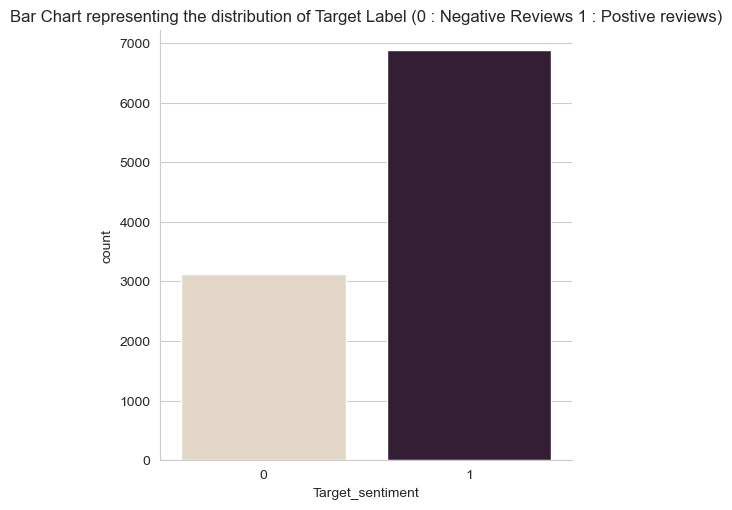

In [63]:
## Calling above function to plot the count plot of the reviews
plot_countplot(business_ratings_lb2)

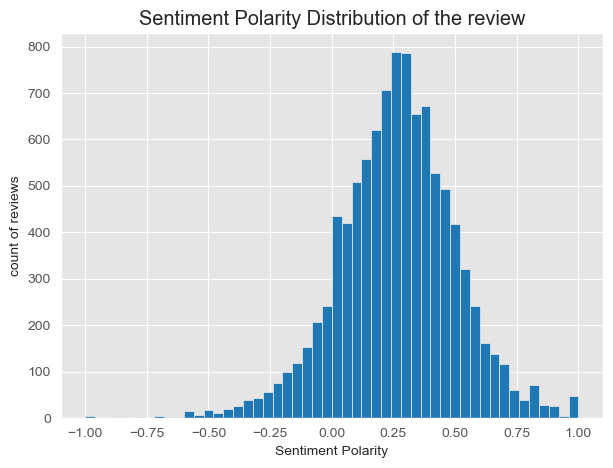

In [64]:
## Calling the above function to plot the histogram of the sentiment polarity of the reviews
plot_histogram(data_vi["sentiment_polarity"], x = "Sentiment Polarity", y = "count of reviews", t = 'Sentiment Polarity Distribution of the review')

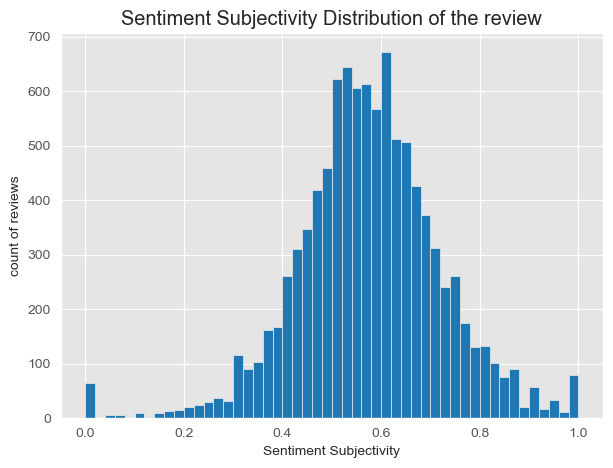

In [65]:
## Calling the above function to plot the histogram of the sentiment subjectivity of the reviews
plot_histogram(data_vi["sentiment_subjectivity"], x = "Sentiment Subjectivity", y = "count of reviews", t = 'Sentiment Subjectivity Distribution of the review')

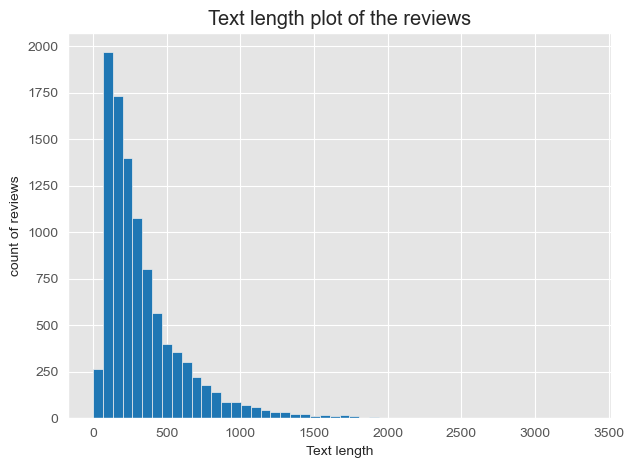

In [66]:
## Calling the above function to plot tbe text length of the reviews
plot_histogram(data_vi["text_length"], x = "Text length", y = "count of reviews", t = 'Text length plot of the reviews')

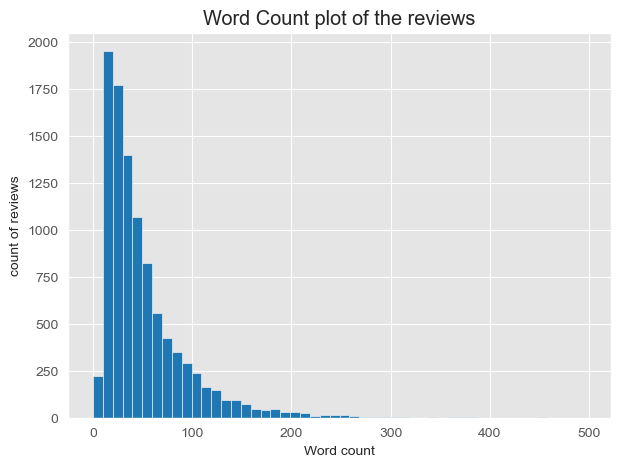

In [67]:
## Calling the above function for plotting the histogram of the word count
plot_histogram(data_vi["Word_count"], x = "Word count", y = "count of reviews", t = 'Word Count plot of the reviews')

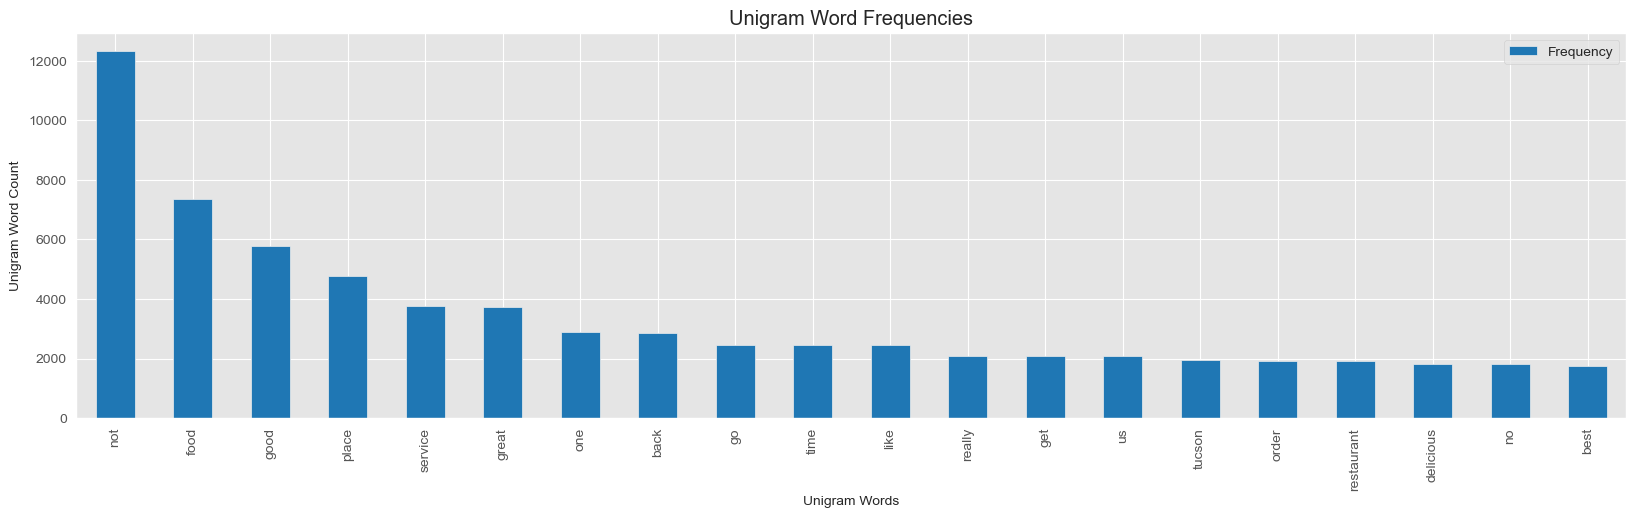

In [68]:
## Calling the above function to calculate the unigram word frequeicies of the reviews
word_df = plot_wordfrequencies(business_ratings_lb2["text"])
## Calling the above function to plot the bar plot of top unigram words of reviews
plot_barchart(word_df,x = "Unigram Words", y = "Unigram Word Count", z = "Unigram Word Frequencies")

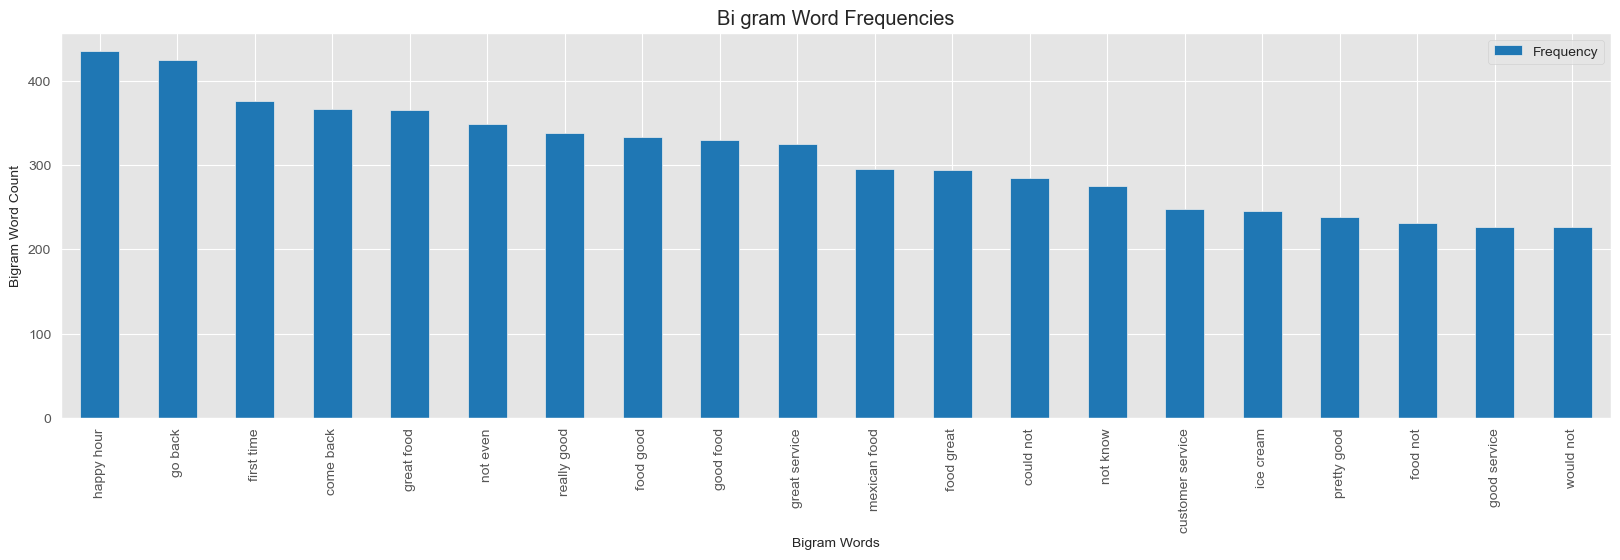

In [69]:
## Calling the above function to calculate the Bi-gram word frequencies of the reviews
word_df1, vectors = bigram_wordfreqplot(business_ratings_lb2["text"])
## Calling the above function to plot the bar plot of top bigram words of reviews
plot_barchart(word_df1,x = "Bigram Words", y = "Bigram Word Count", z = "Bi gram Word Frequencies")

In [70]:
## This function is to calculate and plot bivaraite histograms
def plot_vi(data_visual,d,e,x,y,z,t):
    vis1 = data_visual.loc[data_vi['Target_sentiment'] == 1, z]
    vis2 = data_visual.loc[data_vi['Target_sentiment'] == 0, z]


    ## Plot histogram for distribution of the reviews
    fig, ax = plt.subplots(figsize=(10,5))
    plt.hist(vis1, bins=50, color = "tab:blue", label = d);
    plt.hist(vis2, bins=50, color = "tab:cyan", label = e);
    plt.legend(loc='upper right')
    ax.set_title(t)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [71]:
## This function is to calculate and plot bivaraite barcharts
def plot_words_unigram_and_bigram(index1,index2,freq1,freq2,t,a,b):
    f, ax= plt.subplots(2,2,figsize=(15,5))
    ax = plt.subplot(111)

    ## Plot bi variate barcharts for the reviews
    ax.bar(index1,freq1, width=0.5, color='tab:blue', align='center', label = "Words in postive reviews ")
    ax.bar(index2,freq2, width=0.5, color='tab:cyan', align='center', label = "words in negative reviews")
    plt.xticks(rotation=90)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(t)
    plt.legend()

    plt.show()

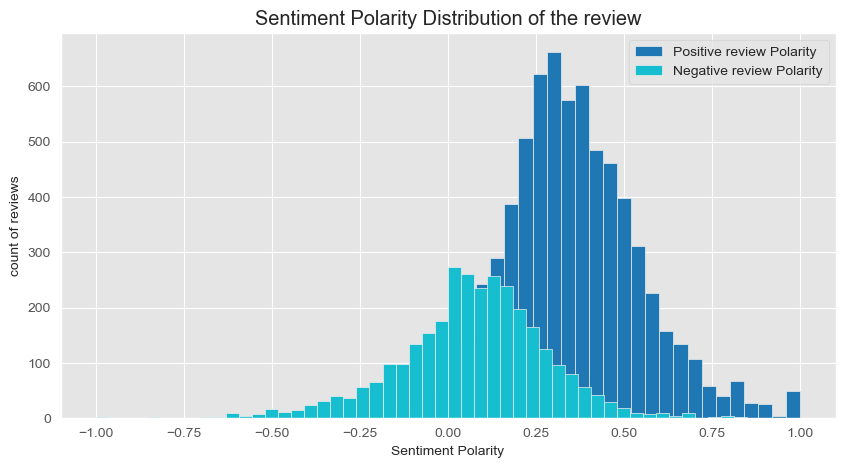

In [72]:
## Calling the above function to plot the histogram of the sentiment polarity for both postive and negative reviews
plot_vi(data_vi, d = "Positive review Polarity", e = "Negative review Polarity", x = "Sentiment Polarity", y = "count of reviews",z='sentiment_polarity', t = 'Sentiment Polarity Distribution of the review')

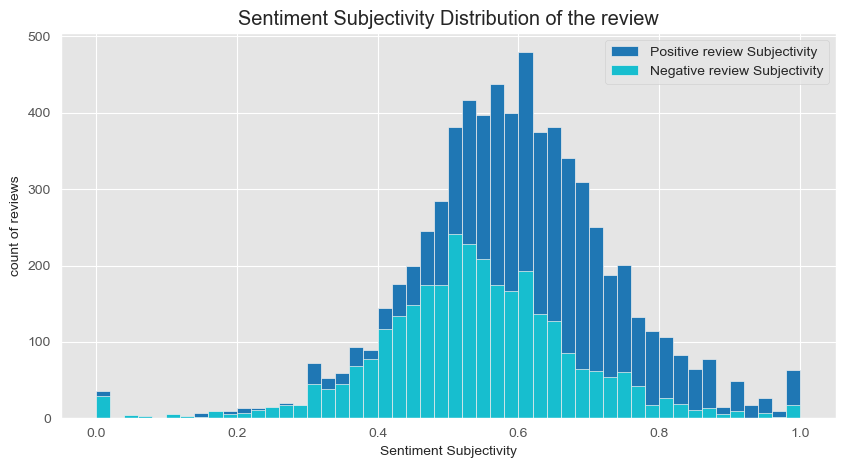

In [73]:
## Calling the above function to plot the histogram of the sentiment subjectivity for both postive and negative reviews
plot_vi(data_vi, d = "Positive review Subjectivity", e = "Negative review Subjectivity", x = "Sentiment Subjectivity", y = "count of reviews",z='sentiment_subjectivity', t = 'Sentiment Subjectivity Distribution of the review')

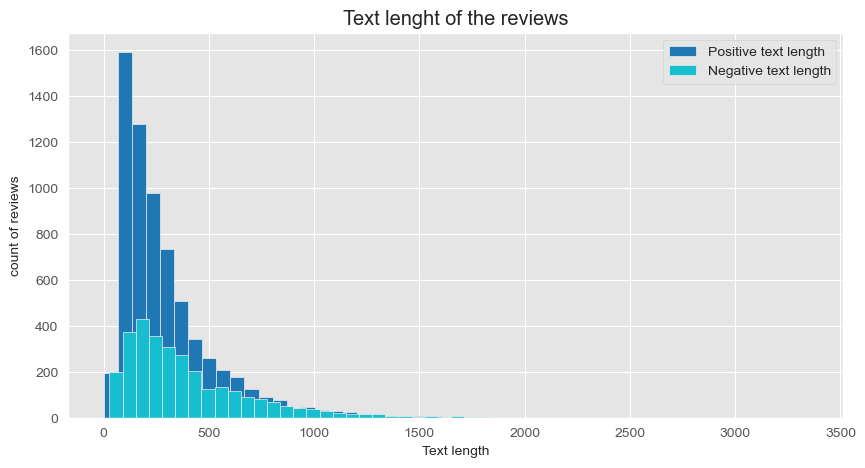

In [74]:
## Calling the above function to plot tbe text length for both postive and negative reviews
plot_vi(data_vi,d = "Positive text length", e = "Negative text length",x = "Text length", y = "count of reviews", z='text_length', t = "Text lenght of the reviews")

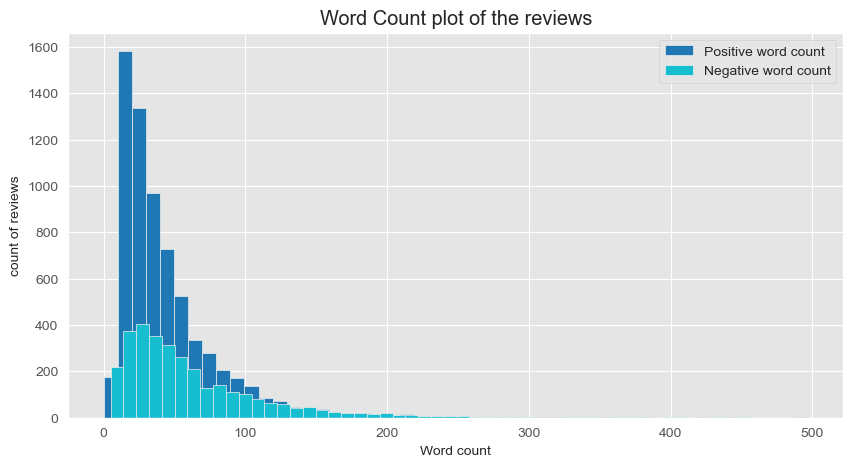

In [75]:
## Calling the above function to plot tbe word count for both postive and negative reviews
plot_vi(data_vi,d = "Positive word count", e = "Negative word count",x = "Word count", y = "count of reviews", z='Word_count', t = "Word Count plot of the reviews")

In [76]:
## Separting the postive and negative reviews and getting the unigram words and their frequencies
word_vis1 = plot_wordfrequencies(data_vi.loc[data_vi['Target_sentiment'] == 1, "text"])
word_vis2 = plot_wordfrequencies(data_vi.loc[data_vi['Target_sentiment'] == 0, "text"])

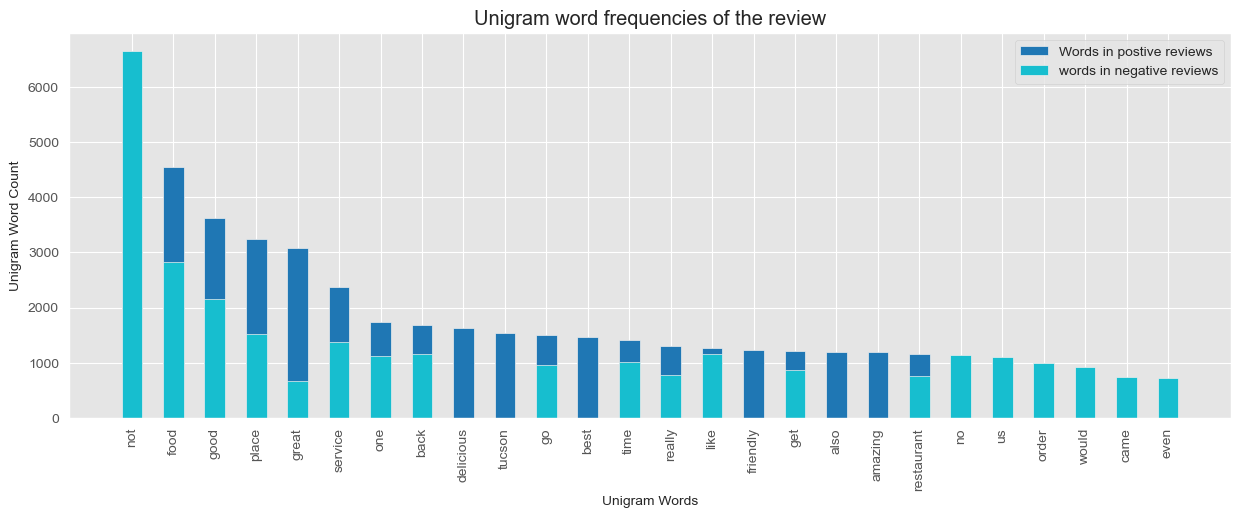

In [77]:
## Calling the above function to plot the bar chart of unigram words for both positive and negative reviews
plot_words_unigram_and_bigram(word_vis1.index,word_vis2.index,word_vis1["Frequency"],word_vis2["Frequency"], t = "Unigram word frequencies of the review", a="Unigram Words", b="Unigram Word Count")

In [78]:
## Separting the postive and negative reviews and getting the bigram words and their frequencies
word_vis4, word_vis4_df  = bigram_wordfreqplot(data_vi.loc[data_vi['Target_sentiment'] == 1, "text"])
word_vis5, word_vis5_df = bigram_wordfreqplot(data_vi.loc[data_vi['Target_sentiment'] == 0, "text"])

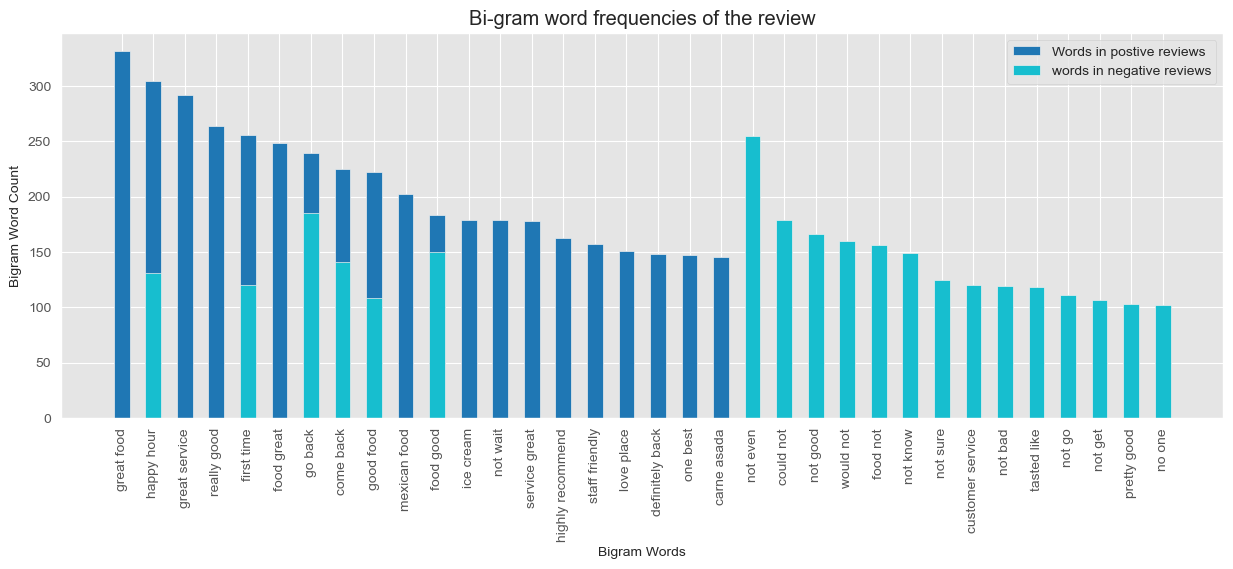

In [79]:
## Calling the above function to plot the bar chart of biigram words for both positive and negative reviews
plot_words_unigram_and_bigram(word_vis4.index,word_vis5.index,word_vis4["Frequency"],word_vis5["Frequency"], t = "Bi-gram word frequencies of the review",  a="Bigram Words", b="Bigram Word Count")

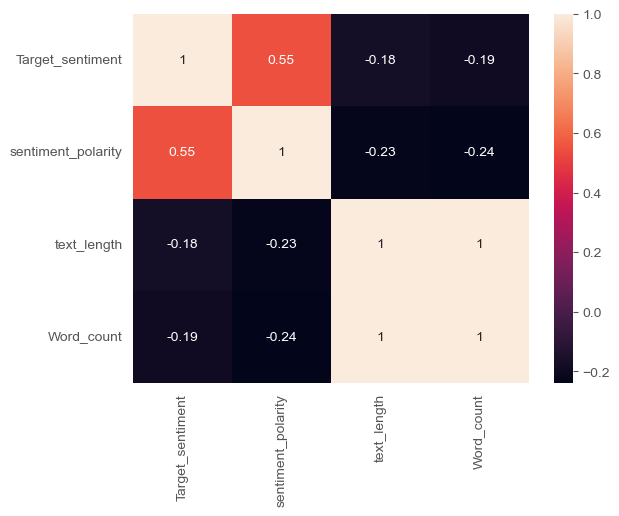

In [80]:
##Correlation Matrix
def matrix(data_vi):
    columns_to_correlate = ["Target_sentiment", "sentiment_polarity", "text_length", "Word_count"]
    data_subset = data_vi[columns_to_correlate]
    matrix_corr = data_subset.corr()
    sns.heatmap(matrix_corr, annot=True)
    plt.show()
matrix(data_vi)

## 4.0 Data Modelling

In [81]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import operator
import sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import spacy

In [82]:
## This code is for spliting the data for train, dev and test set
X_train, X_test, y_train, y_test = train_test_split(data_vi.drop(columns = ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                                                                            'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
                                                                            'attributes', 'categories', 'hours', 'review_id', 'user_id', 'useful',
                                                                            'funny', 'cool', 'date', 'customer_exp', 'length',
                                                                            'Target_sentiment', 'sentiment_polarity','Word_count'], axis = 1), business_ratings_lb2["Target_sentiment"],
                                                    test_size = 0.2, random_state = 40, stratify = business_ratings_lb2["Target_sentiment"] )

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.2, random_state = 40, stratify = y_train)

In [83]:
print("Shape of the train set:", X_train.shape, y_train.shape)
print("Shape of the dev set:", X_dev.shape, y_dev.shape)
print("shape of the test set:", X_test.shape, y_test.shape )

Shape of the train set: (6400, 3) (6400,)
Shape of the dev set: (1600, 3) (1600,)
shape of the test set: (2000, 3) (2000,)


## 4.1 Feature Engineering

4.1.1 Term Frequency - Inverse document frequency feature

In [84]:
## Function for creating tf-idf vectors from text

def tfidf_vec(train,dev,test):
    vectorizer = TfidfVectorizer(ngram_range=(2,2),max_features = 3000)
    vectorizer.fit(train['text'].values)

    X_train_reviews_tfidf = vectorizer.transform(train['text'].values)
    X_dev_reviews_tfidf = vectorizer.transform(dev['text'].values)
    X_test_reviews_tfidf = vectorizer.transform(test['text'].values)

    print("After vectorizations")
    print(X_train_reviews_tfidf.shape)
    print(X_dev_reviews_tfidf.shape)
    print(X_test_reviews_tfidf.shape)
    print("="*100)
    return(X_train_reviews_tfidf,X_dev_reviews_tfidf,X_test_reviews_tfidf )

4.1.2 Spacy feature

In [85]:
## Function for converting text in to spacy vectors
def spacy_text(data, limit=3000):
    """
    Returns a dataframe representation of spacy Vectors
    """
    ## Loading the Spacy Vectors
    nlp = spacy.load('en_core_web_lg')
    spacy_vec = []
    for text in tqdm(data["text"]):
        vec = np.zeros(300)
        word_count = 0
        for word in text.split():
            ## Converting each word in to vectors
            token = nlp(word)
            ## Adding the  word vectors of each sentence
            vec = vec + token.vector
            word_count = word_count + 1
        if word_count != 0:
            f = []
            for i in vec:
                ## Taking the average of the vectors based on the word count
                f.append(i/word_count)
        spacy_vec.append(f)
    X = pd.DataFrame(columns = ['q1'])
    X['q1'] = list(spacy_vec)
    df1 = pd.DataFrame(X.q1.values.tolist(), index= X.index)
    return(spacy_vec,df1)

4.1.3 Numerical Feature

In [86]:
## Function for performing standarization on the numerical feature

def standarizing_numerical(train,dev,test):
    normaliser = Normalizer()
    normaliser.fit(train['text_length'].values.reshape(-1,1))


    X_train_text_len_stand = normaliser.transform(train['text_length'].values.reshape(-1,1))
    X_dev_text_len_stand = normaliser.transform(dev['text_length'].values.reshape(-1,1))
    X_test_text_len_stand = normaliser.transform(test['text_length'].values.reshape(-1,1))
    print("After Normalization")
    print(X_train_text_len_stand.shape)
    print(X_dev_text_len_stand.shape)
    print(X_test_text_len_stand.shape)
    print("="*100)

    return(X_train_text_len_stand,X_dev_text_len_stand, X_test_text_len_stand)

In [87]:
## Calling the above tfidf_vec function to create 3000 dimensional bigram feature
X_train_reviews_tfidf,X_dev_text_len_stand_tfidf,X_test_reviews_tfidf = tfidf_vec(X_train,X_dev,X_test)

After vectorizations
(6400, 3000)
(1600, 3000)
(2000, 3000)


In [ ]:
## Calling the above function spacy_text to create spacy vector feature
X_train_reviews_spacy, X_df_train_reviews_spacy = spacy_text(X_train,limit=3000)
X_dev_reviews_spacy, X_df_dev_reviews_spacy = spacy_text(X_dev, limit=3000)
X_test_reviews_spacy, X_df_test_reviews_spacy = spacy_text(X_test, limit=3000)

 69%|██████▉   | 4405/6400 [16:22<17:36,  1.89it/s]   

In [88]:

#!python -m spacy download en_core_web_lg

In [89]:
X_df_train_reviews_spacy.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.962445,0.119412,-2.897658,-0.131487,1.324144,0.614059,0.717191,2.021476,-1.111525,0.871518,...,0.719626,-0.568496,0.891332,0.182342,-1.602387,-0.045475,0.871572,-0.088986,-1.211691,1.259193
1,-0.713729,-0.760468,-2.411617,0.497592,2.627324,-0.313078,1.438121,2.704275,-1.787524,0.508517,...,-0.490714,-0.235143,1.206588,-0.354849,-1.792276,-0.278516,-0.328845,-0.939743,-1.873268,0.062669


In [90]:
X_df_dev_reviews_spacy.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.336097,1.193294,-1.602274,-0.227807,1.619749,0.657962,1.171282,2.748353,-1.266543,0.340449,...,1.066574,-0.321001,0.278494,-0.564112,-0.791874,-0.127628,0.305207,0.181967,-1.695250,0.898320
1,0.321027,0.183335,-3.038100,0.048371,2.190656,-0.457682,0.581380,3.133737,-2.068570,0.594644,...,-0.493185,0.066865,0.685679,-1.769146,-1.266593,-0.910348,-1.004372,0.338298,-2.681552,0.598456


In [91]:
X_df_test_reviews_spacy.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.023565,1.736713,-1.812995,-0.184076,1.717677,1.129162,0.991558,2.785466,-1.451972,0.485902,...,0.656695,0.030639,0.57671,-0.833859,-0.887450,-0.116233,0.224507,-0.444516,-1.677610,1.410745
1,-0.697373,0.904815,-0.874014,0.198700,1.566226,-0.106227,2.329564,2.363618,-1.790641,0.067879,...,0.869156,-0.564204,0.81368,-0.123139,-0.246202,-0.562226,-0.471757,0.243790,-2.324677,1.370242


In [92]:
## calling the above function to normalise the numerical feature text length
X_train_text_len_stand,X_dev_text_len_stand, X_test_text_len_stand = standarizing_numerical(X_train,X_dev,X_test)

After Normalization
(6400, 1)
(1600, 1)
(2000, 1)


In [93]:
## Fuction for merging textual vectors and numerical feature
def merging(train1,train2,dev1,dev2,test1,test2,tx):
    train_datam = hstack((train1,train2)).tocsr()
    dev_datam = hstack((dev1,dev2)).tocsr()
    test_datam = hstack((test1,test2 )).tocsr()


    print(tx +"final data matrix developed")
    print(train_datam.shape)
    print(dev_datam.shape)
    print(test_datam.shape)
    print("="*100)

    return(train_datam,dev_datam,test_datam)

In [94]:
###### Calling the above function to merge tfidf vectors and numerical text length feature
train_data_tfidf, dev_data_tfidf, test_data_tfidf = merging(X_train_reviews_tfidf,X_train_text_len_stand,X_dev_text_len_stand_tfidf,X_dev_text_len_stand,X_test_reviews_tfidf, X_test_text_len_stand,tx = "TFIDF ",)

TFIDF final data matrix developed
(6400, 3001)
(1600, 3001)
(2000, 3001)


In [95]:
# Concatenate spaCy vectors and numerical features along columns (axis=1)
train_data_spacy = pd.concat([X_df_train_reviews_spacy, pd.DataFrame(X_train_text_len_stand, columns=['text_length'])], axis=1)
dev_data_spacy = pd.concat([X_df_dev_reviews_spacy, pd.DataFrame(X_dev_text_len_stand, columns=['text_length'])], axis=1)
test_data_spacy = pd.concat([X_df_test_reviews_spacy, pd.DataFrame(X_test_text_len_stand, columns=['text_length'])], axis=1)

# Optional: Print the shape of the resulting DataFrames
print("Train Data Shape:", train_data_spacy.shape)
print("Dev Data Shape:", dev_data_spacy.shape)
print("Test Data Shape:", test_data_spacy.shape)

Train Data Shape: (6400, 301)
Dev Data Shape: (1600, 301)
Test Data Shape: (2000, 301)


In [96]:
#### Function for evaluating models

def evaluate(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test,y_test_pred)
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of confusion matrix for Test data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    print("Precision Score of the model:", precision_score(y_test,y_pred)*100)
    print("Recall Score of the model:", recall_score(y_test,y_pred)*100)
    print("Acuracy score of the model:",accuracy_score(y_test,y_pred)*100)
    print("F1 score of the model:",f1_score(y_test,y_pred)*100)


## 4.2 Modelling

## 4.2.1 Baseline Models with features TFIDF and Reviews Length

#### 1. Multinomial Naive Bayes with default parameter-> Baseline

In [97]:
## Initilizaing multinomial naive bayes model and fitting the train data
model =  MultinomialNB()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 83.97645519947679
Recall Score of the model: 95.67809239940388
Acuracy score of the model: 84.85000000000001
F1 score of the model: 89.44618599791013


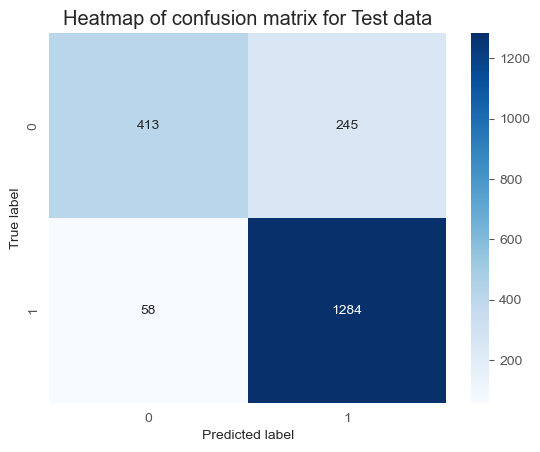

In [98]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 2.  Decision Tree with default parameter-> Baseline

In [99]:
## Initilizaing decision tree classifier and fitting the train data
model = DecisionTreeClassifier()
model = model.fit(train_data_tfidf,y_train)

Precision Score of the model: 79.86526946107784
Recall Score of the model: 79.50819672131148
Acuracy score of the model: 72.8
F1 score of the model: 79.68633308439135


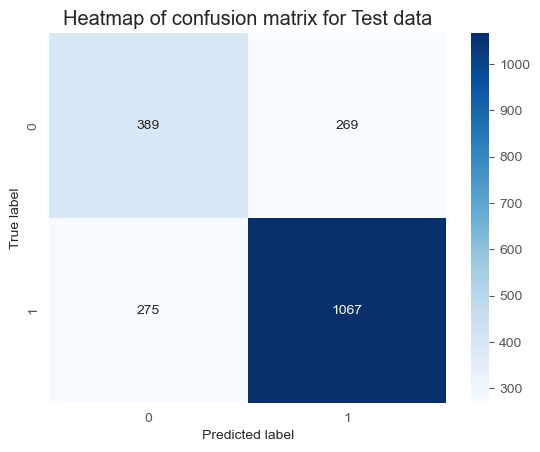

In [100]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 3. Support Vector Machine with default parameter -> Baseline

In [101]:
## Initilizaing support vector classifier and fitting the train data
model = svm.SVC()
model = model.fit(train_data_tfidf,y_train)

Precision Score of the model: 83.1270358306189
Recall Score of the model: 95.08196721311475
Acuracy score of the model: 83.75
F1 score of the model: 88.70351060132083


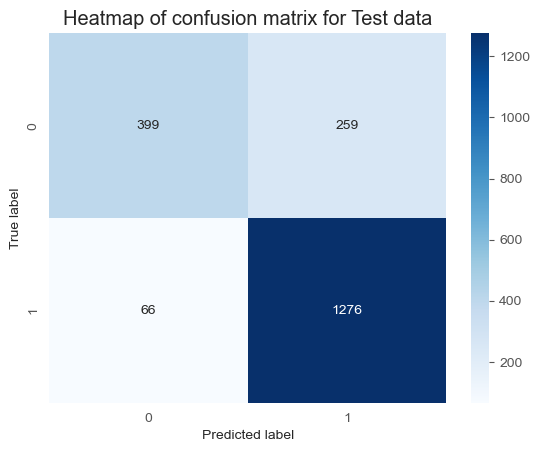

In [102]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 4. Random Forest with default parameters -> Baseline

In [187]:
## Initilizaing random forest classifier and fitting the train data
model =  RandomForestClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 85.21428571428571
Recall Score of the model: 88.89716840536512
Acuracy score of the model: 82.19999999999999
F1 score of the model: 87.01677607585704


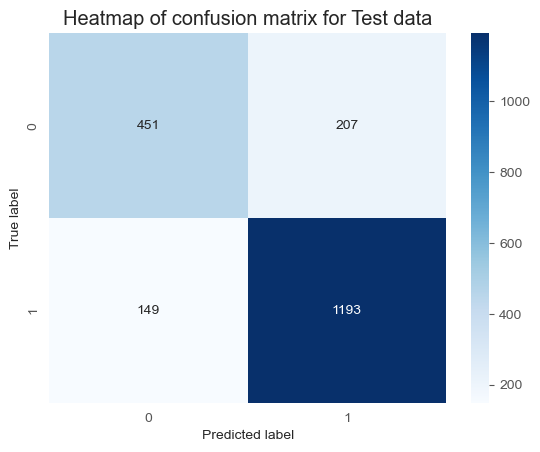

In [188]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 5. XGBoost Classifier with default parameters -> Baseline

In [189]:
## Initilizaing XGBoost Classifier and fitting the train data
model = XGBClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 80.27812895069533
Recall Score of the model: 94.63487332339791
Acuracy score of the model: 80.80000000000001
F1 score of the model: 86.86730506155952


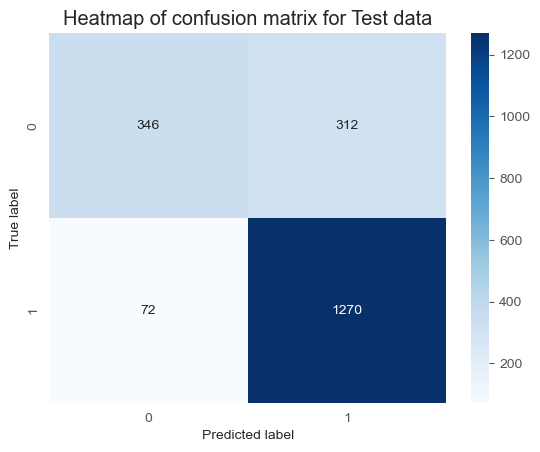

In [190]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 6. Gradient Boosting Classifier with default parameters -> Baseline

In [192]:
## Initilizaing Gradient Boosting Classifier and fitting the train data
model = GradientBoostingClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 75.76633892423365
Recall Score of the model: 97.61549925484351
Acuracy score of the model: 77.45
F1 score of the model: 85.31422989254314


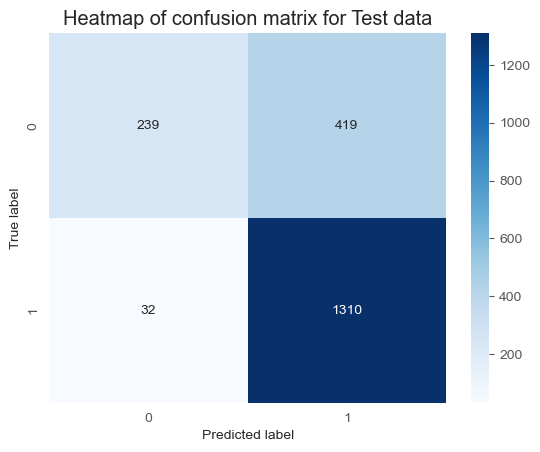

In [193]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 7. Multilayer Perceptron Classifier with default parameters -> Baseline

In [195]:
## Initilizaing Multilayer Perceptron Classifier and fitting the train data
model = MLPClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 83.2468495181616
Recall Score of the model: 83.68107302533532
Acuracy score of the model: 77.75
F1 score of the model: 83.46339650687476


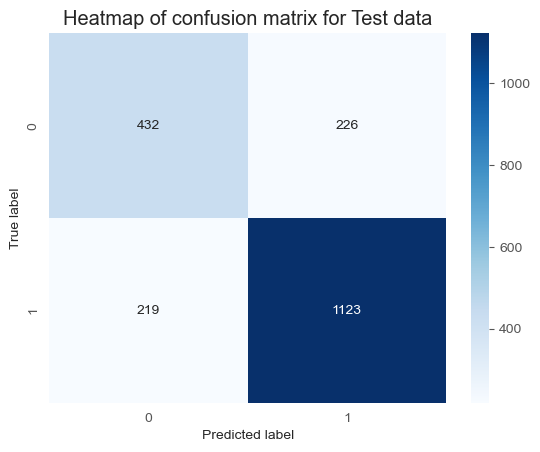

In [196]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

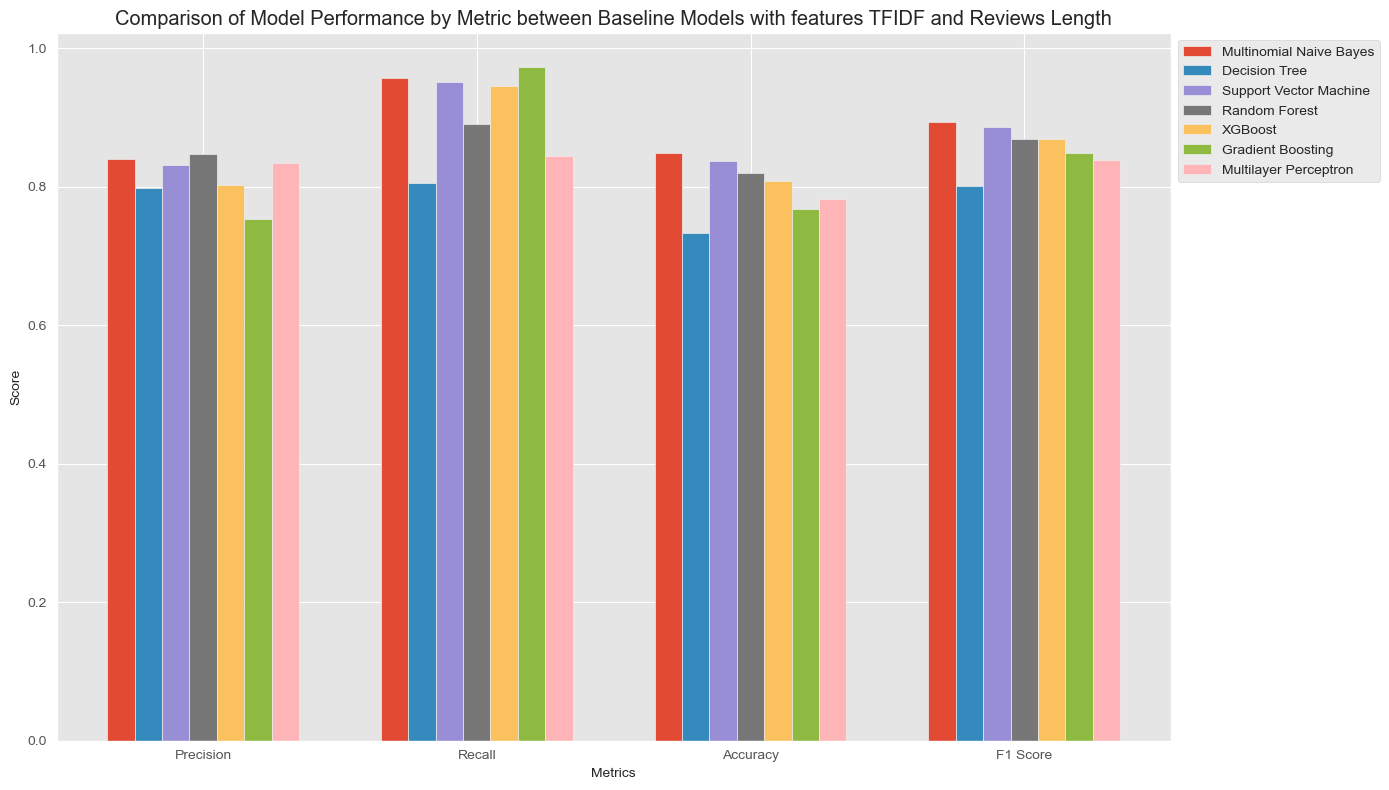

                     Model  Precision    Recall  Accuracy  F1 Score
0  Multinomial Naive Bayes   0.839765  0.956781    0.8485  0.894462
1            Decision Tree   0.798375  0.805514    0.7330  0.801929
2   Support Vector Machine   0.831270  0.950820    0.8375  0.887035
3            Random Forest   0.848227  0.891207    0.8200  0.869186
4                  XGBoost   0.802781  0.946349    0.8080  0.868673
5        Gradient Boosting   0.753606  0.973174    0.7685  0.849431
6    Multilayer Perceptron   0.834315  0.844262    0.7830  0.839259


In [234]:
#Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1 Score"])

# Define models and their hyperparameters
models = [
    {
        "name": "Multinomial Naive Bayes",
        "model": MultinomialNB(),  # Replace with your best_alpha
        "data": train_data_tfidf
    },
    {
        "name": "Decision Tree",
        "model": DecisionTreeClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "Support Vector Machine",
        "model": svm.SVC(),
        "data": train_data_tfidf
    },
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "XGBoost",
        "model": XGBClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "Gradient Boosting",
        "model": GradientBoostingClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "Multilayer Perceptron",
        "model": MLPClassifier(),
        "data": train_data_tfidf
    }
]

# Iterate through models, fit, and evaluate
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    train_data = model_info["data"]

    # Fit the model
    model.fit(train_data, y_train)

    # Predict on test data
    y_test_pred = model.predict(test_data_tfidf)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results to the DataFrame
    results_df = results_df.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "F1 Score": f1
    }, ignore_index=True)


# Set the bar width for separation between metrics
bar_width = 0.1

# Create a grouped bar chart
metrics = ["Precision", "Recall", "Accuracy", "F1 Score"]
n_metrics = len(metrics)
n_models = len(models)
x = np.arange(n_metrics)

plt.figure(figsize=(14, 8))
for i, model_info in enumerate(models):
    model_name = model_info["name"]
    metrics_values = [results_df.loc[results_df["Model"] == model_name, metric].values[0] for metric in metrics]
    plt.bar(x + (i - (n_models - 1) / 2) * bar_width, metrics_values, width=bar_width, label=model_name)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Performance by Metric between Baseline Models with features TFIDF and Reviews Length")
plt.xticks(x, metrics)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Display the results DataFrame
print(results_df)



## 4.2.2 Oversampling Models with features TFIDF and Reviews Length

In [168]:
## Oversampling the train dataset using RandomOver sampler of Imblearn library
def oversampling(train_s,y_trains):
    ros = RandomOverSampler(random_state=0)
    train_data1, y_train1 = ros.fit_resample(train_s, y_trains)
    return(train_data1, y_train1)

In [169]:
## Calling the above function to oversample the train dataset with tfidf and text length feature
train_data1_tfidf,y_train1_tfidf = oversampling(train_data_tfidf,y_train)

In [170]:
## Gridsearch cross validation hyperparameter tuning
def hyper_tuning(t_d,y_t,alpha,parameters):
    clf = GridSearchCV(alpha, param_grid= parameters, cv=5, scoring='f1',return_train_score= True)
    hyper = clf.fit(t_d,y_t)
    print("Best parameters for the algorithm", hyper.best_estimator_)
    print("Best cross validation score :", hyper.best_score_)
    return(hyper.best_estimator_)

#### 1. Multinomial Naive Bayes with oversampling of the train dataset and hyperparameter tuning

In [171]:
## Calling the above function for tuning multinomial naive bayes algorithm using gridsearch cv then fitting the train dataset with best parameter
model =  hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha = MultinomialNB(fit_prior=True, class_prior=None),parameters = {'alpha':[1000,500,100,50,10,5,0.5,1, 0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]})
model = model.fit(train_data1_tfidf, y_train1_tfidf)

Best parameters for the algorithm MultinomialNB(alpha=0.05)
Best cross validation score : 0.8535153252298245


Precision Score of the model: 87.25782414307004
Recall Score of the model: 87.25782414307004
Acuracy score of the model: 82.89999999999999
F1 score of the model: 87.25782414307004


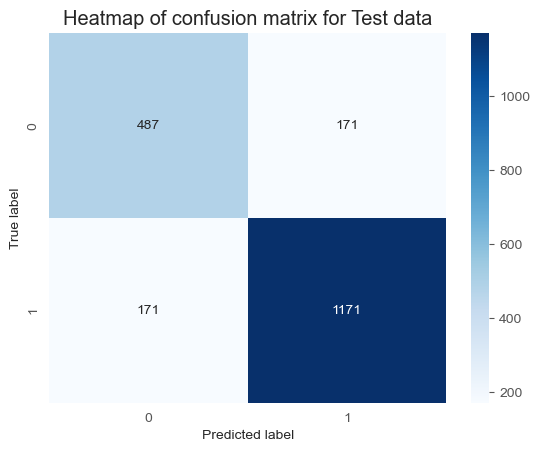

In [172]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred)

#### 2. Decision Tress with oversampling of the train dataset and hyperparameter tuning

In [173]:
## Calling the above function for tuning decision tree classifier using gridsearch cv then fitting the train dataset with best parameter
model =  hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha = DecisionTreeClassifier(),parameters = {"max_features":[1,2,3,4,5],"max_depth":[int(x) for x in range(10)],"min_samples_leaf":[1,2,3,4,5],"min_samples_split":[1,2,3,4,5],"criterion":["gini","entropy"]})
model = model.fit(train_data1_tfidf, y_train1_tfidf)

Best parameters for the algorithm DecisionTreeClassifier(max_depth=9, max_features=4, min_samples_leaf=4,
                       min_samples_split=5)
Best cross validation score : 0.6751424269954273


Precision Score of the model: 68.8325409403064
Recall Score of the model: 97.09388971684054
Acuracy score of the model: 68.55
F1 score of the model: 80.55641421947449


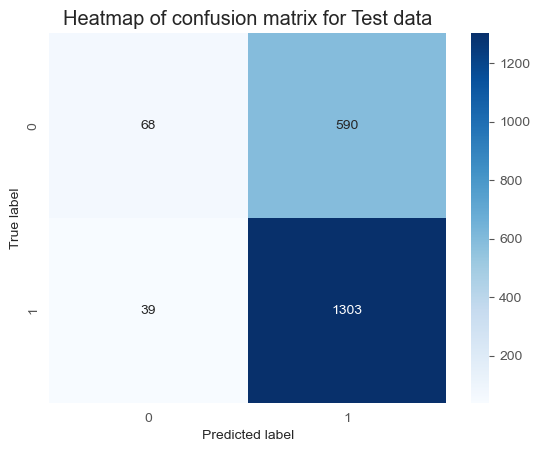

In [174]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred)


#### 3. Support Vector Machine with oversampling of the train dataset and hyperparameter tuning

In [175]:
## Calling the above function for tuning Support vector classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
model = hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha =  SGDClassifier(loss = 'hinge'),parameters = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],'penalty' :[ 'l2','l1'],'max_iter':[20]})
model = model.fit(train_data1_tfidf, y_train1_tfidf)

Best parameters for the algorithm SGDClassifier(max_iter=20)
Best cross validation score : 0.851908514653832


Precision Score of the model: 85.80738595220855
Recall Score of the model: 88.301043219076
Acuracy score of the model: 82.35
F1 score of the model: 87.03635695923614


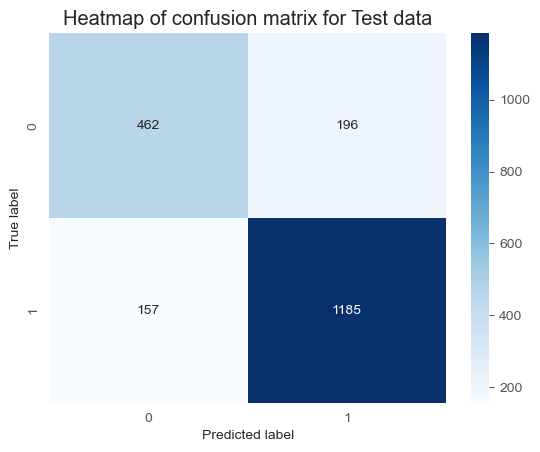

In [176]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred)

#### 4. Random Forest with oversampling of the train dataset and hyperparameter tuning

In [177]:
## Calling the above function for tuning Random Forest classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
#model = hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha =  RandomForestClassifier(n_jobs = -1),parameters = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4]})
#model = model.fit(train_data1_tfidf, y_train1_tfidf)

In [116]:
## prediction on the test dataset and then evalauting the model performance
#y_test_pred = model.predict(test_data_tfidf)
#evaluate(y_test,y_test_pred)

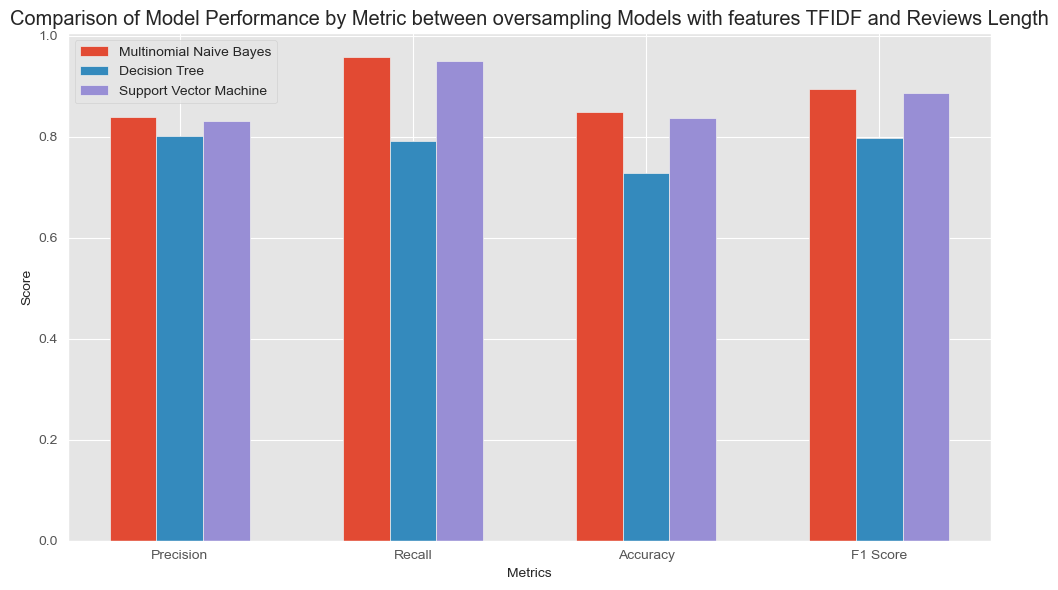

Empty DataFrame
Columns: [Model, Precision, Recall, Accuracy, F1 Score]
Index: []


In [117]:
# Create an empty DataFrame to store the results
results_df1 = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1 Score"])

# Define models and their hyperparameters
models = [
    {
        "name": "Multinomial Naive Bayes",
        "model": MultinomialNB(alpha=0.05),  # Replace with your best_alpha
        "data": train_data1_tfidf
    },
    {
        "name": "Decision Tree",
        "model": DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_leaf=4),
        "data": train_data1_tfidf
    },
    {
        "name": "Support Vector Machine",
        "model": SGDClassifier(alpha=0.01, max_iter=20),
        "data": train_data1_tfidf
    }
]

# Iterate through models, fit, and evaluate
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    train_data = model_info["data"]

    # Fit the model
    model.fit(train_data, y_train1_tfidf)

    # Predict on test data
    y_test_pred = model.predict(test_data_tfidf)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results to the DataFrame
    results_df = results_df.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "F1 Score": f1
    }, ignore_index=True)


# Set the bar width for separation between metrics
bar_width = 0.2

# Create a grouped bar chart
metrics = ["Precision", "Recall", "Accuracy", "F1 Score"]
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
for i, model_info in enumerate(models):
    model_name = model_info["name"]
    metrics_values = [results_df.loc[results_df["Model"] == model_name, metric].values[0] for metric in metrics]
    plt.bar(x + i * bar_width, metrics_values, width=bar_width, label=model_name)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Performance by Metric between oversampling Models with features TFIDF and Reviews Length")
plt.xticks(x + bar_width, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Display the results DataFrame
print(results_df1)



## 4.2.3 Oversampling Models with features Spacy and Reviews Length

In [118]:
# Convert column names to strings
train_data_spacy.columns = train_data_spacy.columns.astype(str)

# Call the oversampling function
train_data1_spacy, y_train1_spacy = oversampling(train_data_spacy, y_train)

####  1. Support Vector Machine with oversampling of the train dataset and hyperparameter tuning

In [119]:
## Calling the above function for tuning Support vector classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
model = hyper_tuning(train_data1_spacy,y_train1_spacy,alpha =  SGDClassifier(loss = 'hinge'),parameters = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],'penalty' :[ 'l2','l1'],'max_iter':[20]})
model = model.fit(train_data1_spacy, y_train1_spacy)

Best parameters for the algorithm SGDClassifier(alpha=0.01, max_iter=20)
Best cross validation score : 0.8513855980723708


Precision Score of the model: 94.6046511627907
Recall Score of the model: 75.78241430700447
Acuracy score of the model: 80.85
F1 score of the model: 84.15390980554407


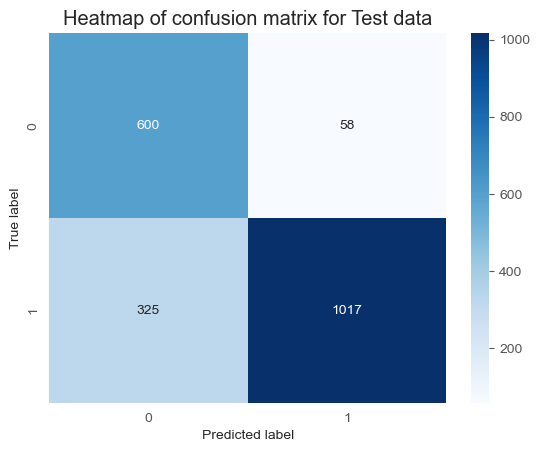

In [120]:
# Convert column names to strings
test_data_spacy.columns = test_data_spacy.columns.astype(str)
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_spacy)
evaluate(y_test,y_test_pred)

#### 2. Random Forest with oversampling of the train dataset and hyperparameter tuning

In [121]:
## Calling the above function for tuning Random forest classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
#model = hyper_tuning(train_data1_spacy,y_train1_spacy,alpha =  RandomForestClassifier(n_jobs = -1),parameters = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],'min_samples_split':[2,4, 5, 10],'min_samples_leaf':[1, 2, 4]})
#model = model.fit(train_data1_spacy, y_train1_spacy)

In [122]:
## prediction on the test dataset and then evalauting the model performance
#y_test_pred = model.predict(test_data_spacy)
#evaluate(y_test,y_test_pred)

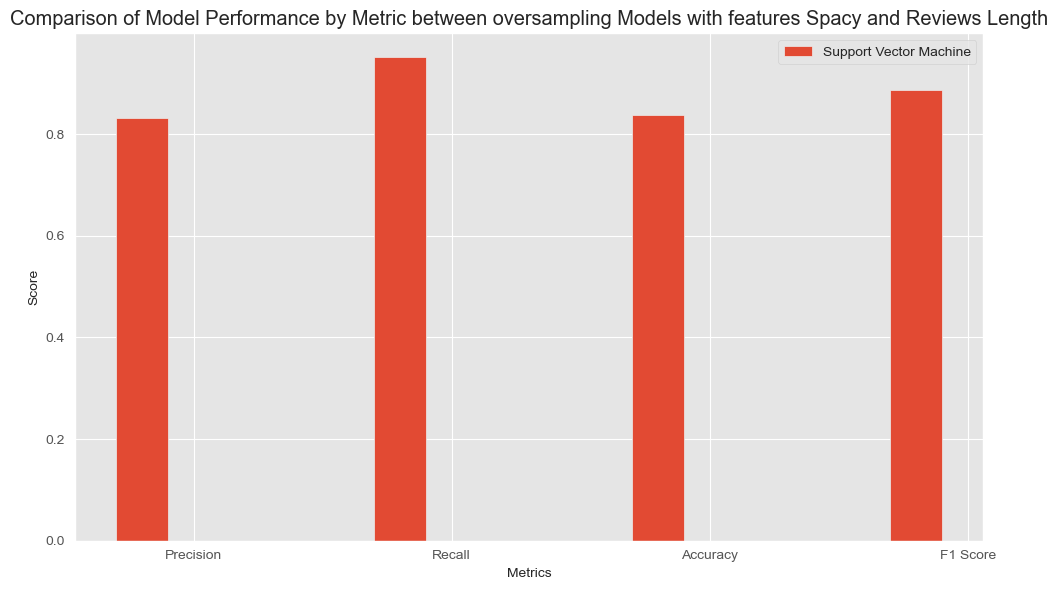

Empty DataFrame
Columns: [Model, Precision, Recall, Accuracy, F1 Score]
Index: []


In [123]:
# Create an empty DataFrame to store the results
results_df2 = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1 Score"])

# Define models and their hyperparameters
models = [
    {
        "name": "Support Vector Machine",
        "model": SGDClassifier(alpha=0.005, max_iter=20),
        "data": train_data1_spacy
    }
]

# Iterate through models, fit, and evaluate
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    train_data = model_info["data"]

    # Fit the model
    model.fit(train_data, y_train1_spacy)

    # Predict on test data
    y_test_pred = model.predict(test_data_spacy)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results to the DataFrame
    results_df = results_df.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "F1 Score": f1
    }, ignore_index=True)


# Set the bar width for separation between metrics
bar_width = 0.2

# Create a grouped bar chart
metrics = ["Precision", "Recall", "Accuracy", "F1 Score"]
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
for i, model_info in enumerate(models):
    model_name = model_info["name"]
    metrics_values = [results_df.loc[results_df["Model"] == model_name, metric].values[0] for metric in metrics]
    plt.bar(x + i * bar_width, metrics_values, width=bar_width, label=model_name)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Performance by Metric between oversampling Models with features Spacy and Reviews Length")
plt.xticks(x + bar_width, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Display the results DataFrame
print(results_df2)


## 5.0 Time Series Analysis and Rating Forecast

In [131]:
# Import Libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

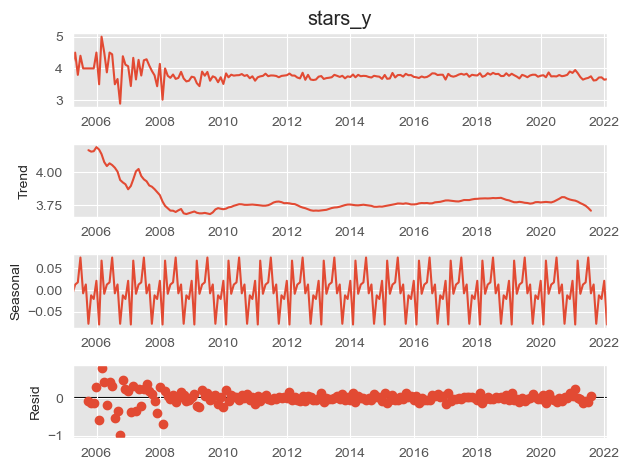

In [147]:
# Assuming 'date' column is in datetime format, if not, convert it first
business_ratings['date'] = pd.to_datetime(business_ratings['date'])

# Create a DataFrame with 'date' and 'stars_y' columns
business_ratings_dt = business_ratings[['date', 'stars_y']]

# Set 'date' column as the index
business_ratings_dt.set_index('date', inplace=True)

# Resample to a weekly frequency
business_ratings_date_monthly = business_ratings_dt['stars_y'].resample('M').mean()  # You can choose other aggregation methods

# Handle missing values by filling with the mean
mean_value = business_ratings_date_monthly.mean()
business_ratings_date_monthly.fillna(mean_value, inplace=True)

# Time Series Decomposition (Trend, Seasonal, Residual)
decomposition = seasonal_decompose(business_ratings_date_monthly, model='additive')
decomposition.plot()
plt.show()

In [148]:
# Augmented Dickey-Fuller Test for Stationarity
result = adfuller(business_ratings_date_monthly.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -7.546659446794496
p-value: 3.2699418015906406e-11


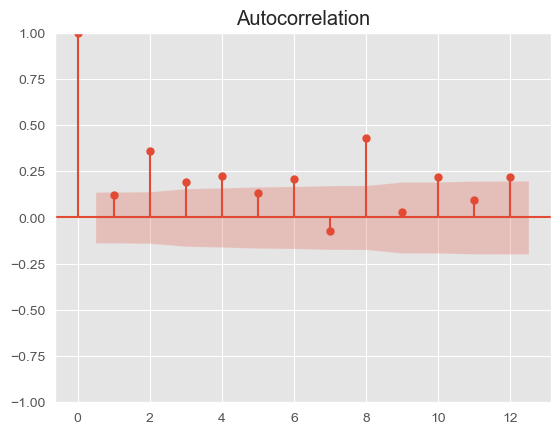

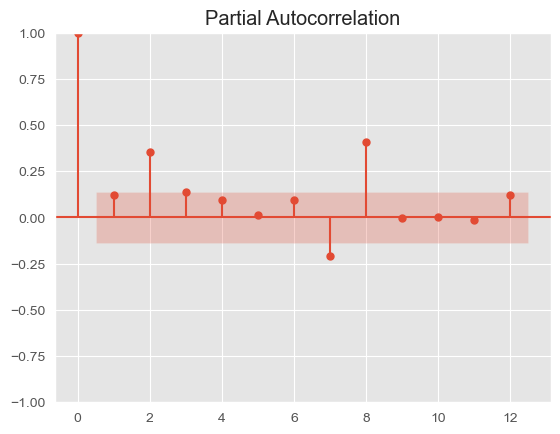

In [149]:
# Autocorrelation and Partial Autocorrelation Plots
plot_acf(business_ratings_date_monthly, lags=12)  # Autocorrelation
plt.show()
plot_pacf(business_ratings_date_monthly, lags=12)  # Partial Autocorrelation
plt.show()

In [150]:
# Forecasting using Holt-Winters Exponential Smoothing
train_size = int(len(business_ratings_date_monthly) * 0.8)  # 80% of data for training
train, test = business_ratings_date_monthly[:train_size], business_ratings_date_monthly[train_size:]

model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=24)
model_fit = model.fit()

forecast_period = len(test)
forecast = model_fit.forecast(steps=forecast_period)
forecast

2018-09-30    3.608707
2018-10-31    3.825577
2018-11-30    3.798561
2018-12-31    3.770375
2019-01-31    3.737449
2019-02-28    3.817247
2019-03-31    3.705554
2019-04-30    3.953947
2019-05-31    3.745766
2019-06-30    3.950555
2019-07-31    3.854536
2019-08-31    3.840813
2019-09-30    3.813343
2019-10-31    3.773370
2019-11-30    3.759835
2019-12-31    3.895311
2020-01-31    3.669317
2020-02-29    3.970143
2020-03-31    3.903284
2020-04-30    3.796575
2020-05-31    3.899234
2020-06-30    3.914858
2020-07-31    3.760813
2020-08-31    3.827015
2020-09-30    3.641541
2020-10-31    3.858411
2020-11-30    3.831395
2020-12-31    3.803209
2021-01-31    3.770283
2021-02-28    3.850081
2021-03-31    3.738388
2021-04-30    3.986781
2021-05-31    3.778600
2021-06-30    3.983389
2021-07-31    3.887370
2021-08-31    3.873647
2021-09-30    3.846177
2021-10-31    3.806204
2021-11-30    3.792669
2021-12-31    3.928145
2022-01-31    3.702151
Freq: M, dtype: float64

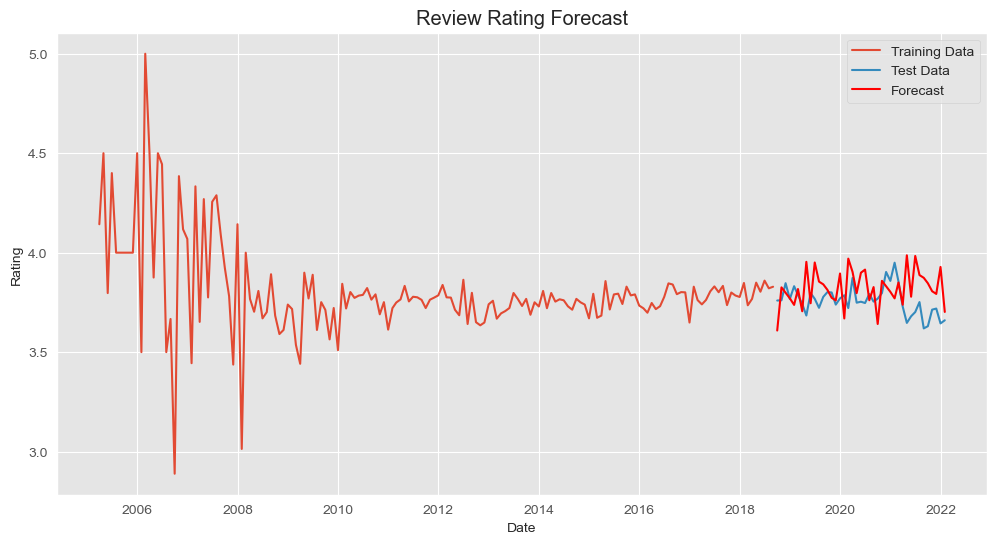

In [151]:
# Plotting the Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Review Rating Forecast')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

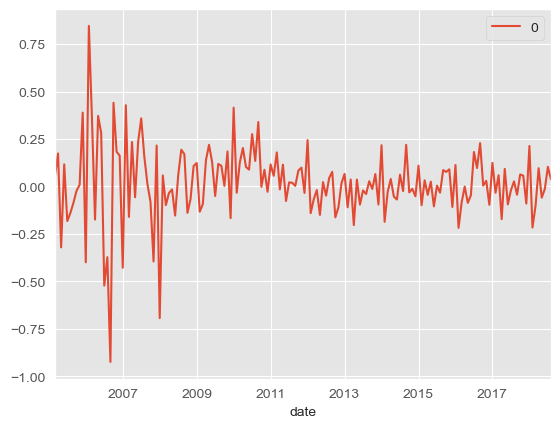

In [237]:
# Plot Residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

In [259]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.10974119827850333
Mean Squared Error (MSE): 0.019817378828509122
Root Mean Squared Error (RMSE): 0.1407742122283379


In [8]:
# Initialize an empty DataFrame to store the data
all_data = pd.DataFrame()

# Define the file path
file_path = 'datasets/yelp_academic_dataset_user.json'

# Specify the chunk size
chunksize = 100000

# Read the file in chunks and concatenate them
for chunk in pd.read_json(file_path, lines=True, chunksize=chunksize):
    all_data = pd.concat([all_data, chunk])

# Now, 'all_data' contains the entire dataset


In [12]:
# Initialize an empty DataFrame to store the data
all_data = pd.DataFrame()

# Define the file path
file_path = 'datasets/yelp_academic_dataset_user.json'

# Specify the chunk size
chunksize = 100000

# Read the file in chunks and concatenate them
for chunk in pd.read_json(file_path, lines=True, chunksize=chunksize):
    all_data = pd.concat([all_data, chunk])

# Now, 'all_data' contains the entire dataset

In [13]:
def load_data(file_path, chunksize=100000):
    """Load the data into a DataFrame in chunks."""
    all_data = pd.DataFrame()
    for chunk in pd.read_json(file_path, lines=True, chunksize=chunksize):
        all_data = pd.concat([all_data, chunk])
    return all_data